In [2]:
import pandas as pd
import warnings

warnings.filterwarnings("ignore")


In [3]:
df = pd.read_csv('../../datamarts/final_dataframe.tsv', sep='\t')

In [4]:
df.head()

Timestamp  NUMERO  CCAA  CAPROV  TAMAMU  DENSIDAD  SUPERF  \
0  2016-01-01T00:00:00       1     7       0       1         1      96   
1  2016-01-01T00:00:00      47     7       0       1         1     100   
2  2016-01-01T00:00:00      53     7       1       4         3      80   
3  2016-01-01T00:00:00      67     7       1       4         2      85   
4  2016-01-01T00:00:00      68     7       0       1         1      90   

   AGUACALI  CALEF  ZONARES  ...  EDUCACIÓN_NO_FORMAL_104  RESTAURACIÓN_111  \
0         1      1        3  ...                      NaN        668.274699   
1         1      1        1  ...                      NaN               NaN   
2         1      1        5  ...                      NaN        111.840309   
3         1      1        5  ...                      NaN          4.016997   
4         1      1        5  ...                      NaN        319.334544   

   ALOJAMIENTO_112  CUIDADOS_PERSONALES_121  EFECTOS_PERSONALES_123  \
0              NaN                98.935487                0.300641   
1              NaN                      NaN                     NaN   
2              NaN                      NaN                     NaN   
3              NaN                      NaN                3.614237   
4       159.860498                73.549838                     NaN   

   PROTECCIÓN_SOCIAL_124  SEGUROS_125  SERVICIOS_FINANCIEROS_126  \
0                    NaN    32.562055                        NaN   
1                    NaN    27.276033                        NaN   
2                    NaN    47.234176                        NaN   
3                    NaN          NaN                        NaN   
4                    NaN    33.530006                        NaN   

   OTROS_SERVICIOS_127  REMESAS_128  
0             1.535195          NaN  
1                  NaN          NaN  
2                  NaN          NaN  
3                  NaN          NaN  
4            66.724382          NaN  

[5 rows x 78 columns]

## Analísis de sensibilidad por código

### 🗂 Categorías por código (Super_Categoría)

| Código | Categoría                                                                                           |
|--------|-----------------------------------------------------------------------------------------------------|
| 01.1   | PRODUCTOS ALIMENTICIOS                                                                              |
| 01.2   | BEBIDAS NO ALCOHÓLICAS                                                                              |
| 02.1   | BEBIDAS ALCOHÓLICAS                                                                                 |
| 02.2   | TABACO                                                                                              |
| 03.1   | ARTÍCULOS DE VESTIR                                                                                 |
| 03.2   | CALZADO                                                                                             |
| 04.1   | ALQUILERES REALES DE LA VIVIENDA                                                                    |
| 04.2   | ALQUILERES IMPUTADOS DE LA VIVIENDA                                                                 |
| 04.3   | GASTOS CORRIENTES DE MANTENIMIENTO Y REPARACIÓN DE LA VIVIENDA                                     |
| 04.4   | SUMINISTRO DE AGUA Y OTROS SERVICIOS RELACIONADOS CON LA VIVIENDA                                  |
| 04.5   | ELECTRICIDAD, GAS Y OTROS COMBUSTIBLES                                                              |
| 05.1   | MUEBLES, ARTÍCULOS DE AMUEBLAMIENTO, ALFOMBRAS Y OTROS REVESTIMIENTOS PARA SUELOS                  |
| 05.2   | ARTÍCULOS TEXTILES PARA EL HOGAR                                                                    |
| 05.3   | APARATOS DE CALEFACCIÓN Y DE COCINA, FRIGORÍFICOS, LAVADORAS Y OTROS GRANDES ELECTRODOMÉSTICOS     |
| 05.4   | CRISTALERÍA, VAJILLA, CUBERTERÍA Y OTROS UTENSILIOS DEL HOGAR                                       |
| 05.5   | HERRAMIENTAS PARA CASA Y JARDÍN                                                                     |
| 05.6   | BIENES Y SERVICIOS PARA EL MANTENIMIENTO CORRIENTE DEL HOGAR                                       |
| 06.1   | PRODUCTOS FARMACÉUTICOS; APARATOS Y MATERIAL TERAPÉUTICO                                            |
| 06.2   | SERVICIOS MÉDICOS Y PARAMÉDICOS AMBULATORIOS                                                        |
| 06.3   | SERVICIOS HOSPITALARIOS                                                                             |
| 07.1   | COMPRA DE VEHÍCULOS                                                                                 |
| 07.2   | UTILIZACIÓN DE VEHÍCULOS PERSONALES                                                                 |
| 07.3   | SERVICIOS DE TRANSPORTE                                                                             |
| 08.1   | SERVICIOS POSTALES                                                                                  |
| 08.2   | EQUIPOS DE TELÉFONO Y FAX                                                                           |
| 08.3   | SERVICIOS DE TELÉFONO Y FAX                                                                         |
| 09.1   | EQUIPOS Y ACCESORIOS AUDIOVISUALES, FOTOGRÁFICOS Y DE PROCESAMIENTO DE INFORMACIÓN                 |
| 09.2   | OTROS BIENES DURADEROS PARA EL OCIO Y LA CULTURA                                                   |
| 09.3   | OTROS ARTÍCULOS Y EQUIPOS PARA EL OCIO, JARDINERÍA Y MASCOTAS                                      |
| 09.4   | SERVICIOS RECREATIVOS Y CULTURALES                                                                  |
| 09.5   | PRENSA, LIBRERÍA Y PAPELERÍA                                                                        |
| 09.6   | PAQUETES TURÍSTICOS                                                                                 |
| 10.1   | EDUCACIÓN INFANTIL Y PRIMARIA (NIVELES 0 Y 1 CNED-P-2014)                                           |
| 10.2   | EDUCACIÓN SECUNDARIA Y EDUCACIÓN POSTSECUNDARIA NO SUPERIOR (NIVELES 2, 3 Y 4 CNED-P-2014)         |
| 10.3   | EDUCACIÓN SUPERIOR (NIVELES 5, 6, 7 y 8 CNED-P-2014)                                                |
| 10.4   | EDUCACIÓN NO FORMAL (NIVEL 9 CNED-P-2014)                                                           |
| 11.1   | RESTAURACIÓN                                                                                        |
| 11.2   | SERVICIOS DE ALOJAMIENTO                                                                            |
| 12.1   | CUIDADOS PERSONALES                                                                                 |
| 12.3   | EFECTOS PERSONALES NO DECLARADOS ANTERIORMENTE                                                     |
| 12.4   | PROTECCIÓN SOCIAL                                                                                   |
| 12.5   | SERVICIOS DE SEGUROS                                                                                |
| 12.6   | SERVICIOS FINANCIEROS NO DECLARADOS EN OTRA PARTE                                                  |
| 12.7   | OTROS SERVICIOS NO DECLARADOS ANTERIORMENTE                                                        |
| 12.8   | REMESAS                                                                                             |


---


In [5]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

def run_sensitivity_analysis_by_category(df, output_columns, p_value_threshold=0.05, vif_threshold=None, normalize=True):
    """
    Runs a multiple linear regression for each specified spending column.
    Optionally normalizes explanatory variables and removes multicollinearity and non-significant variables.
    Returns fitted models, significant coefficients, and model metrics.
    """

    def remove_multicollinearity(X, threshold):
        if threshold is None:
            return X  # Skip VIF filtering if threshold is None
        while True:
            vif = pd.Series(
                [variance_inflation_factor(X.values, i) for i in range(X.shape[1])],
                index=X.columns
            )
            max_vif = vif.max()
            if max_vif > threshold:
                var_to_remove = vif.idxmax()
                X = X.drop(columns=[var_to_remove])
            else:
                break
        return X

    def backward_elimination(X, y, significance_level):
        X = sm.add_constant(X, has_constant='add')
        while True:
            model = sm.OLS(y, X).fit()
            p_values = model.pvalues.drop("const", errors="ignore")
            if p_values.empty:
                break
            max_p = p_values.max()
            if max_p > significance_level:
                var_to_remove = p_values.idxmax()
                X = X.drop(columns=[var_to_remove])
            else:
                break
        return X

    model_results = {}
    significant_coefficients = []
    model_metrics = []
    discarded_categories = []

    excluded_columns = set(output_columns + ["GASTOT_MENSUAL", "NUMERO", "CCAA", "Inflacion"])
    explanatory_vars = [col for col in df.select_dtypes(include=["number"]).columns if col not in excluded_columns]

    for target in output_columns:
        df_clean = df.dropna(subset=[target] + explanatory_vars)
        if df_clean.shape[0] < len(explanatory_vars) + 5:
            discarded_categories.append((target, "Insufficient data after dropna"))
            continue

        X_data = df_clean[explanatory_vars]
        y_data = df_clean[target]

        # Optional normalization
        if normalize:
            scaler = StandardScaler()
            X_data = pd.DataFrame(scaler.fit_transform(X_data), columns=X_data.columns, index=X_data.index)

        try:
            X_vif = remove_multicollinearity(X_data, vif_threshold)
            X_selected = backward_elimination(X_vif, y_data, significance_level=p_value_threshold)

            if X_selected.shape[1] <= 1:
                discarded_categories.append((target, "No significant variables left"))
                continue

            model = sm.OLS(y_data, X_selected).fit()
            model_results[target] = model

            # Coefficient DataFrame
            coef_df = pd.DataFrame({
                "Variable": model.params.index,
                "Coeficiente": model.params.values,
                "P-Valor": model.pvalues.values,
                "Categoría_Gasto": target
            })
            coef_df = coef_df[(coef_df["P-Valor"] < p_value_threshold) & (coef_df["Variable"] != "const")]
            significant_coefficients.append(coef_df)

            # Metrics
            model_metrics.append({
                "Gasto": target,
                "R²": model.rsquared,
                "R² Ajustado": model.rsquared_adj,
                "AIC": model.aic,
                "BIC": model.bic,
                "Nº Observaciones": int(model.nobs)
            })

        except Exception as e:
            discarded_categories.append((target, f"Error: {e}"))
            continue

    coefficients_df = pd.concat(significant_coefficients, ignore_index=True) if significant_coefficients else pd.DataFrame()
    metrics_df = pd.DataFrame(model_metrics).sort_values(by="R² Ajustado", ascending=False)

    return model_results, coefficients_df, metrics_df, discarded_categories


In [6]:
output_columns = [col for col in df.columns if col.endswith(tuple(f"_{i}" for i in range(11, 129)))]

In [7]:
results, coef_df, metrics_df, discarded = run_sensitivity_analysis_by_category(
    df,
    output_columns,
    p_value_threshold=0.05,   
    vif_threshold=5,       
    normalize=True        
)


In [8]:
metrics_df

Gasto        R²  R² Ajustado  \
7    ALQUILERES_IMPUTADOS_DE_LA_VIVIENDA_42  0.649936     0.649880   
9                     SUMINISTRO_DE_AGUA_44  0.289541     0.289432   
6       ALQUILERES_REALES_DE_LA_VIVIENDA_41  0.286647     0.286273   
10   ELECTRICIDAD_GAS_OTROS_COMBUSTIBLES_45  0.277433     0.277323   
0                 PRODUCTOS_ALIMENTICIOS_11  0.244300     0.244185   
41                              SEGUROS_125  0.229673     0.229551   
32          EDUCACIÓN_INFANTIL_PRIMARIA_101  0.226581     0.225841   
25                SERVICIOS_TELÉFONO_FAX_83  0.222536     0.222424   
44                              REMESAS_128  0.214995     0.213655   
33  EDUCACIÓN_SECUNDARIA_POSTSECUNDARIA_102  0.205044     0.204240   
34                   EDUCACIÓN_SUPERIOR_103  0.165139     0.164369   
36                         RESTAURACIÓN_111  0.155002     0.154849   
31                   PAQUETES_TURÍSTICOS_96  0.138389     0.137922   
37                          ALOJAMIENTO_112  0.122416     0.121995   
38                  CUIDADOS_PERSONALES_121  0.109523     0.109404   
16        BIENES_SERVICIOS_PARA_EL_HOGAR_56  0.105170     0.105054   
20                   COMPRA_DE_VEHÍCULOS_71  0.089713     0.088911   
40                    PROTECCIÓN_SOCIAL_124  0.088123     0.086762   
4                    ARTÍCULOS_DE_VESTIR_31  0.086373     0.086189   
1                 BEBIDAS_NO_ALCOHÓLICAS_12  0.082328     0.082193   
21           USO_DE_VEHÍCULOS_PERSONALES_72  0.076477     0.076308   
35                  EDUCACIÓN_NO_FORMAL_104  0.077368     0.076159   
24                  EQUIPOS_TELÉFONO_FAX_82  0.073933     0.073595   
22               SERVICIOS_DE_TRANSPORTE_73  0.062741     0.062500   
5                                CALZADO_32  0.061932     0.061695   
30                      PRENSA_PAPELERÍA_95  0.059185     0.058956   
19               SERVICIOS_HOSPITALARIOS_63  0.058571     0.057076   
2                    BEBIDAS_ALCOHÓLICAS_21  0.041892     0.041715   
11                MUEBLES_REVESTIMIENTOS_51  0.036760     0.036485   
26              AUDIOVISUALES_TECNOLOGÍA_91  0.033681     0.033401   
13             GRANDES_ELECTRODOMÉSTICOS_53  0.033071     0.032866   
17               PRODUCTOS_FARMACÉUTICOS_61  0.032843     0.032649   
29      SERVICIOS_RECREATIVOS_CULTURALES_94  0.031153     0.030949   
28              OCIO_JARDINERÍA_MASCOTAS_93  0.028485     0.028271   
3                                 TABACO_22  0.028062     0.027670   
23                    SERVICIOS_POSTALES_81  0.028323     0.027435   
12                TEXTILES_PARA_EL_HOGAR_52  0.020853     0.020396   
15              HERRAMIENTAS_CASA_JARDÍN_55  0.017152     0.016820   
8           MANTENIMIENTO_DE_LA_VIVIENDA_43  0.016773     0.016428   
27              BIENES_DURADEROS_DE_OCIO_92  0.016964     0.016243   
39                   EFECTOS_PERSONALES_123  0.015813     0.015538   
43                      OTROS_SERVICIOS_127  0.014954     0.014637   
14                  UTENSILIOS_DEL_HOGAR_54  0.014538     0.014225   
18        SERVICIOS_MÉDICOS_AMBULATORIOS_62  0.012044     0.011838   
42                SERVICIOS_FINANCIEROS_126  0.010839     0.010275   

             AIC           BIC  Nº Observaciones  
7   1.922283e+06  1.922520e+06            143826  
9   1.775994e+06  1.776255e+06            163428  
6   5.701455e+05  5.703444e+05             41977  
10  1.770167e+06  1.770427e+06            164172  
0   2.219736e+06  2.219996e+06            163789  
41  1.770484e+06  1.770743e+06            157854  
32  2.935244e+05  2.937186e+05             24084  
25  1.574723e+06  1.574962e+06            159545  
44  1.279288e+05  1.280585e+05              9981  
33  2.524505e+05  2.526253e+05             20770  
34  2.487916e+05  2.489324e+05             18454  
36  1.793087e+06  1.793322e+06            127277  
31  4.991816e+05  4.993796e+05             40596  
37  5.185212e+05  5.186930e+05             39701  
38  1.716812e+06  1.717021e+06            148786  
1

### 📊 Interpretación de los resultados del modelo OLS por categoría de gasto

Cada modelo OLS estima el gasto en una **supercategoría** a partir de variables explicativas como edad, ingresos, tipo de hogar, zona, etc. Para evaluar la calidad del ajuste del modelo, se analiza principalmente:

---

#### 🔹 **R² (Coeficiente de determinación)**
- Indica la proporción de la variabilidad del gasto explicada por el modelo.
- Va de 0 a 1: cuanto más alto, mejor.

**Ejemplos:**
- `ALQUILERES_IMPUTADOS_DE_LA_VIVIENDA` tiene un **R² de 0.65** → el modelo explica el **65%** de la variabilidad en el gasto. Es un ajuste bastante bueno.
- `PRODUCTOS_ALIMENTICIOS` tiene un **R² de 0.24** → el modelo explica solo el **24%** del gasto. Aceptable, pero deja gran parte sin explicar.
- `SERVICIOS_FINANCIEROS` tiene un **R² de 0.01** → el modelo **no logra explicar prácticamente nada** del gasto en esta categoría.

---

#### 🔹 **R² ajustado**
- Penaliza la inclusión de variables irrelevantes. Muy útil cuando hay muchas variables predictoras.
- Si es similar al R², indica que las variables añadidas aportan información real.

---

### ✅ Conclusiones de los resultados obtenidos

- 💡 **El modelo predice bien ciertas categorías estructurales y regulares del hogar:**
  - `ALQUILERES_IMPUTADOS_DE_LA_VIVIENDA`: R² = **0.65**
  - `SUMINISTRO_DE_AGUA`: R² = **0.29**
  - `ALQUILERES_REALES_DE_LA_VIVIENDA`: R² = **0.29**
  - `ELECTRICIDAD_GAS_OTROS_COMBUSTIBLES`: R² = **0.28**

  Estas categorías están probablemente determinadas por factores socioeconómicos (ingresos, tamaño del hogar, localización), lo cual el modelo capta con eficacia.

- 🟡 **Otras categorías muestran un ajuste moderado:**
  - `PRODUCTOS_ALIMENTICIOS`: R² = **0.24**
  - `SEGUROS`: R² = **0.23**
  - `EDUCACIÓN_INFANTIL_PRIMARIA`: R² = **0.23**

  Son áreas donde el comportamiento del gasto es más complejo, pero todavía parcialmente explicado por las variables del modelo.

- ❌ **Muchas categorías tienen un ajuste bajo (R² < 0.10):**
  - `CALZADO`, `TABACO`, `OCIO`, `EFECTOS_PERSONALES`, `SERVICIOS_POSTALES`, `SERVICIOS_MÉDICOS`, etc.

  En estos casos, el gasto puede depender de factores no observados en el modelo (gustos, hábitos, salud, eventos puntuales, etc.), o ser tan variable que no se puede modelar fácilmente con regresión lineal.

---

Como vemos, el modelo OLS es útil para estimar **gastos básicos y sistemáticos del hogar**, pero tiene **limitaciones claras** en categorías personales, esporádicas o con bajo gasto. Para estas últimas, podrían explorarse modelos no lineales, técnicas de segmentación o incluso análisis cualitativos.


### Graficamos los coeficientes por categoría

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_coefficients_per_category(coefficients_df):
    """
    Genera un gráfico de barras por cada categoría de gasto mostrando
    los coeficientes de regresión de las variables explicativas.
    """

    for categoria, df_cat in coefficients_df.groupby("Categoría_Gasto"):
        if df_cat.empty:
            continue

        plt.figure(figsize=(10, 6))
        sns.barplot(data=df_cat, x="Variable", y="Coeficiente", palette="coolwarm")
        plt.axhline(0, color="black", linestyle="--")
        plt.xticks(rotation=90)

        plt.title(f"Impacto de variables explicativas en: {categoria}")
        plt.xlabel("Variables explicativas")
        plt.ylabel("Coeficiente de regresión")
        plt.tight_layout()
        plt.show()


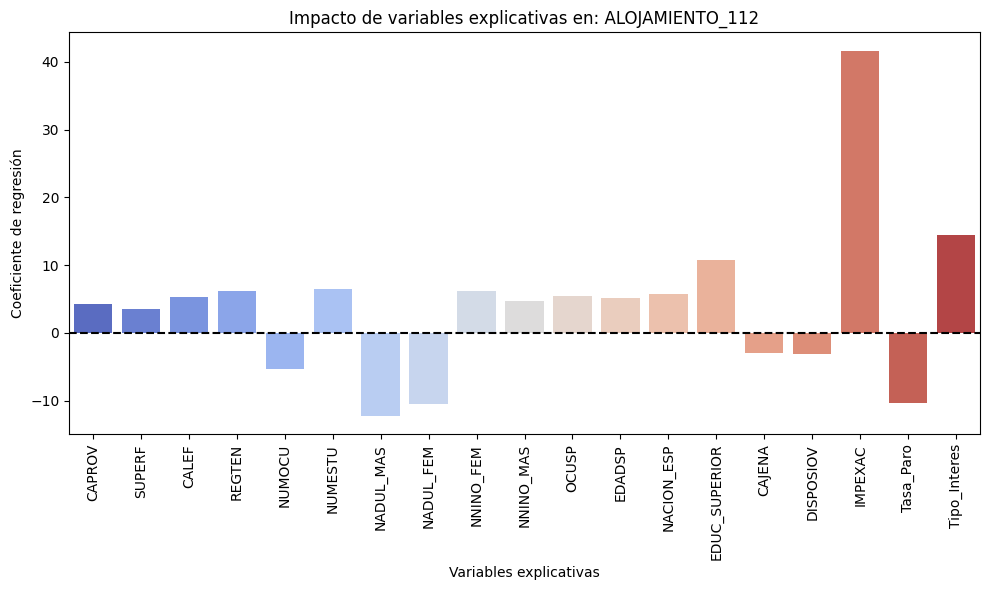

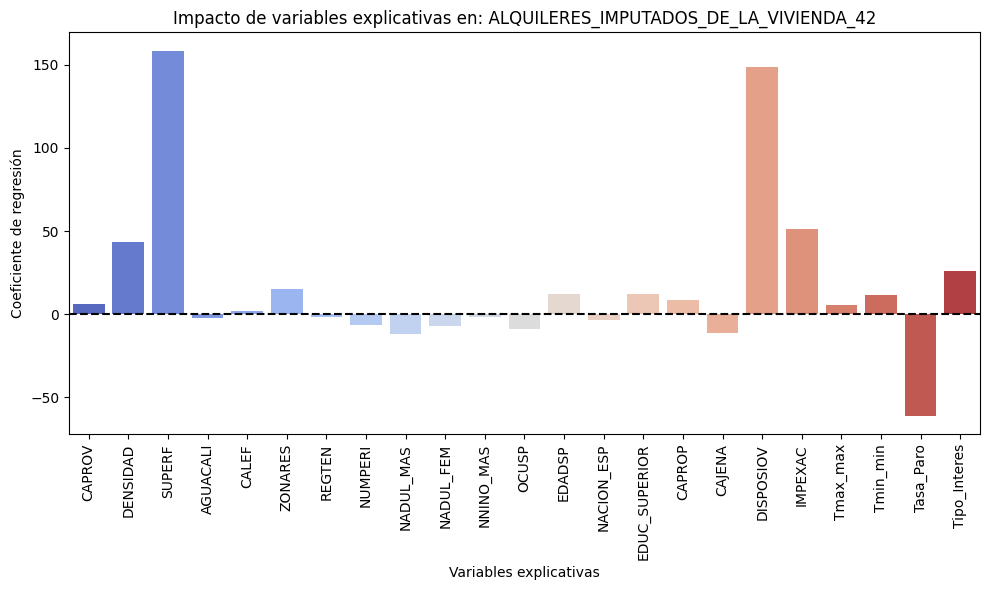

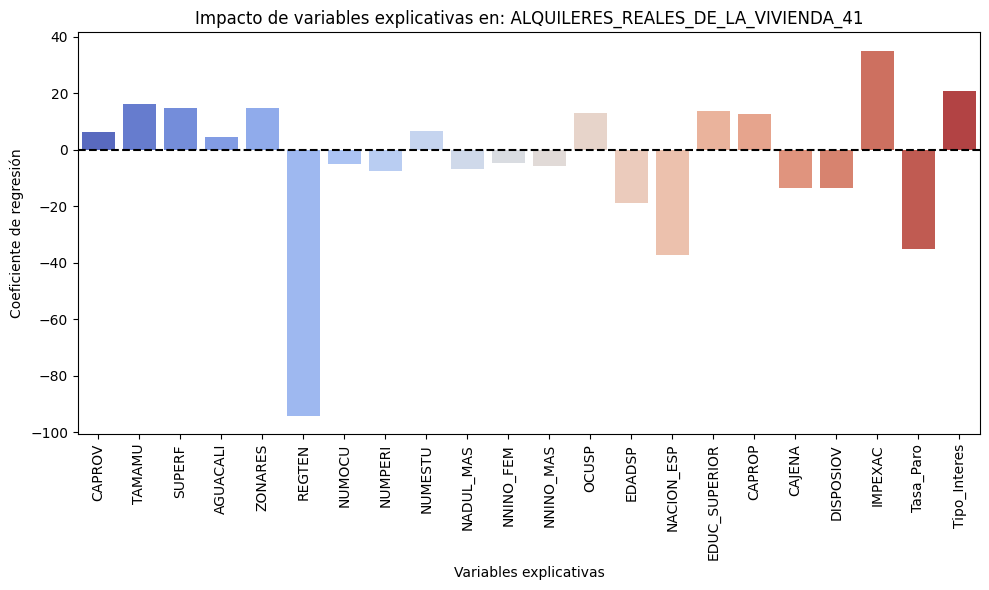

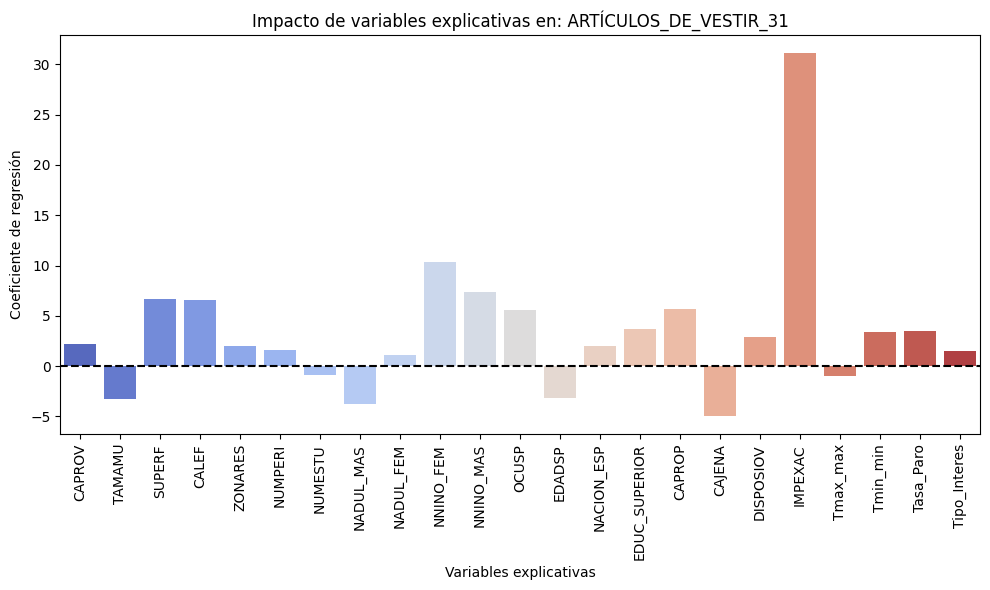

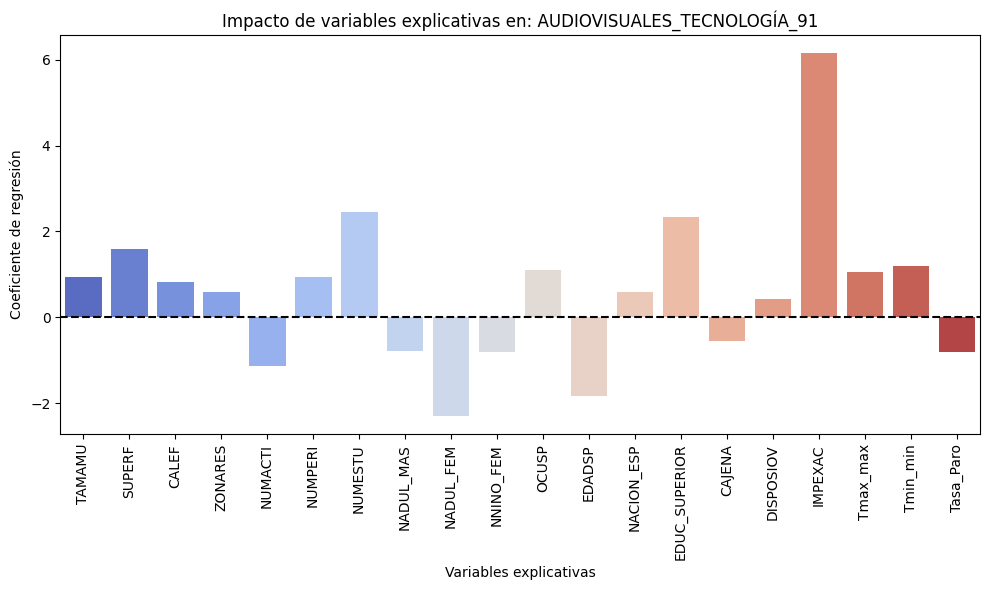

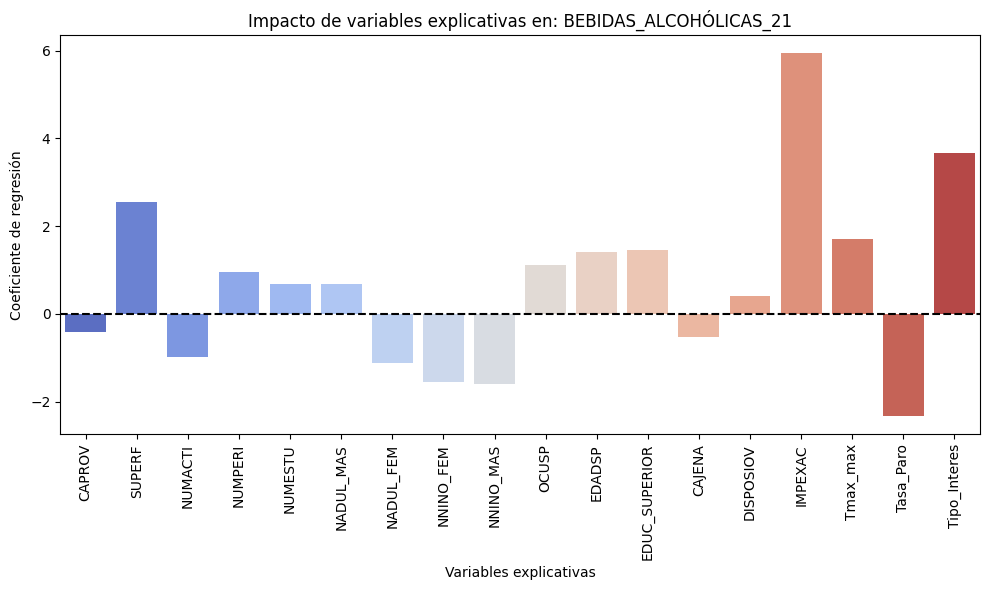

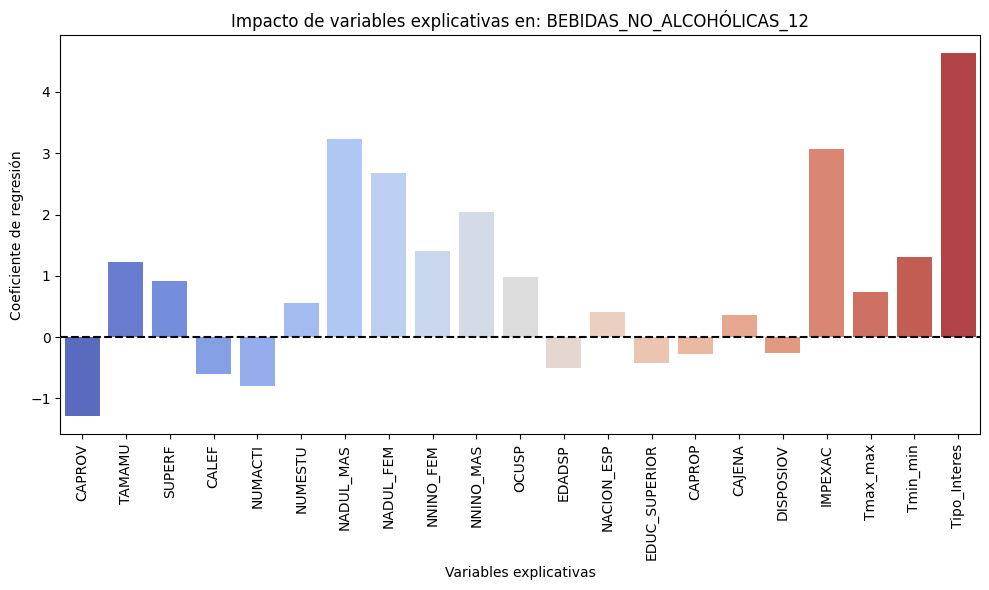

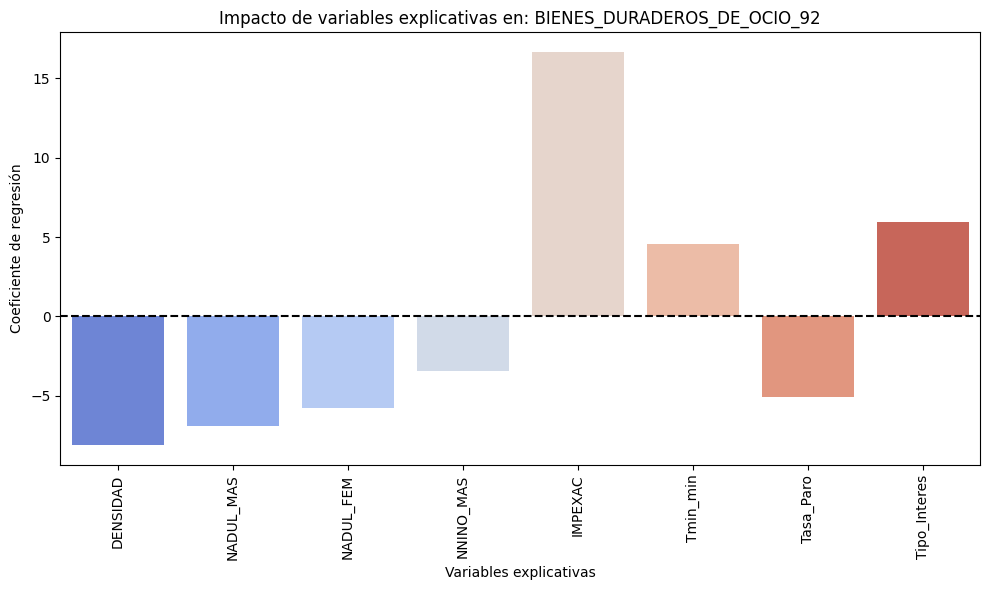

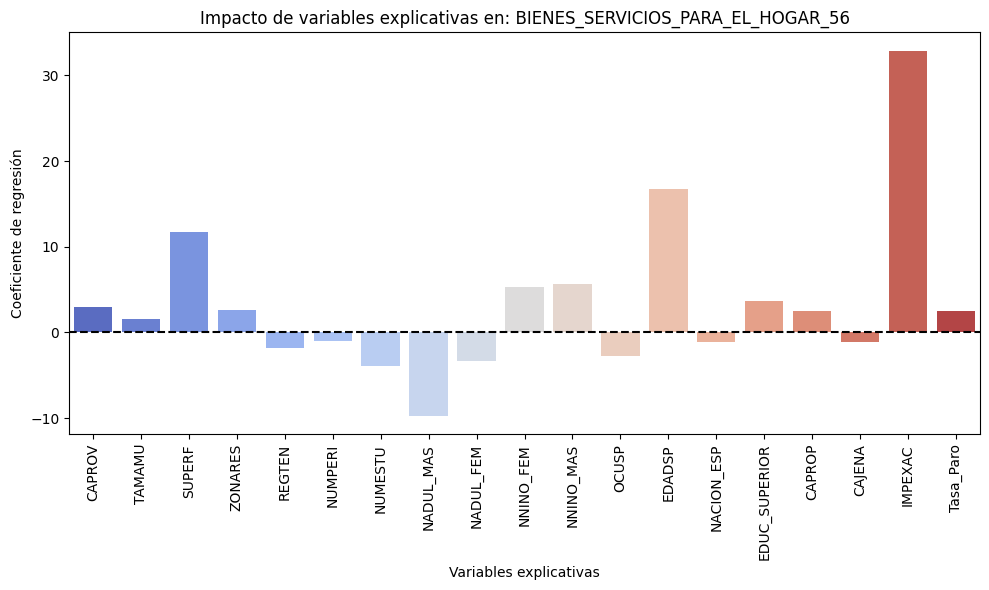

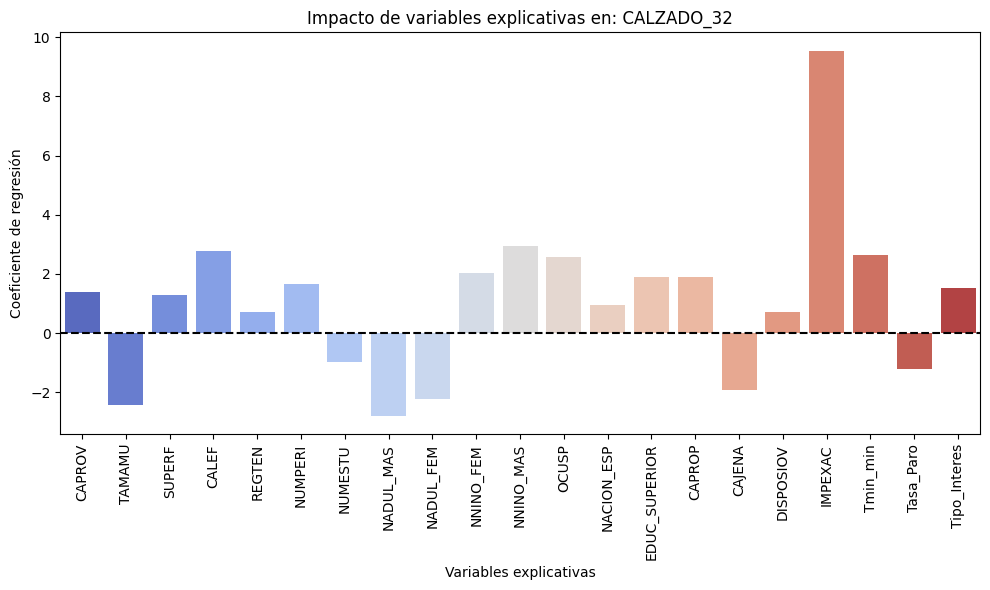

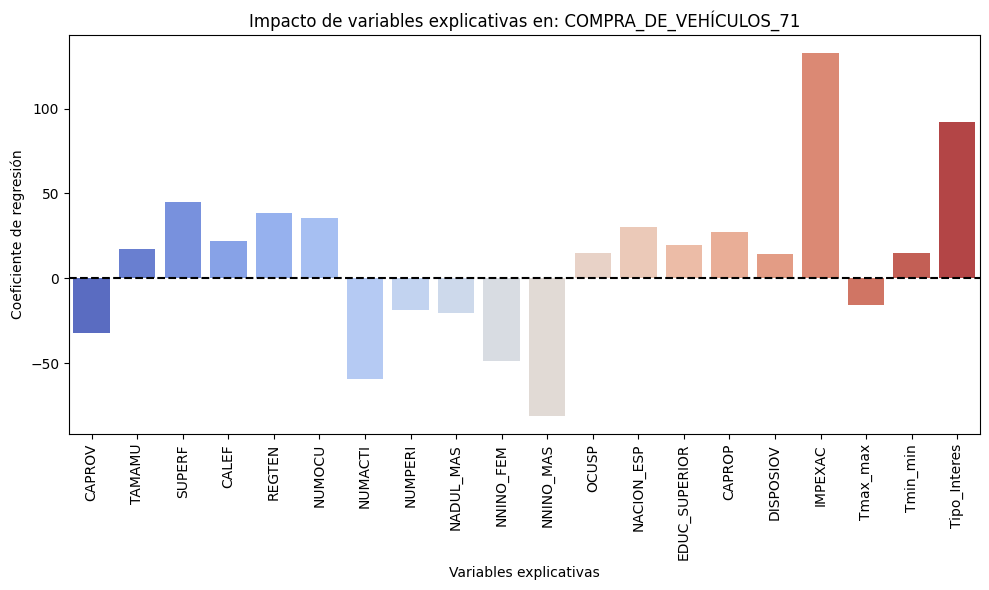

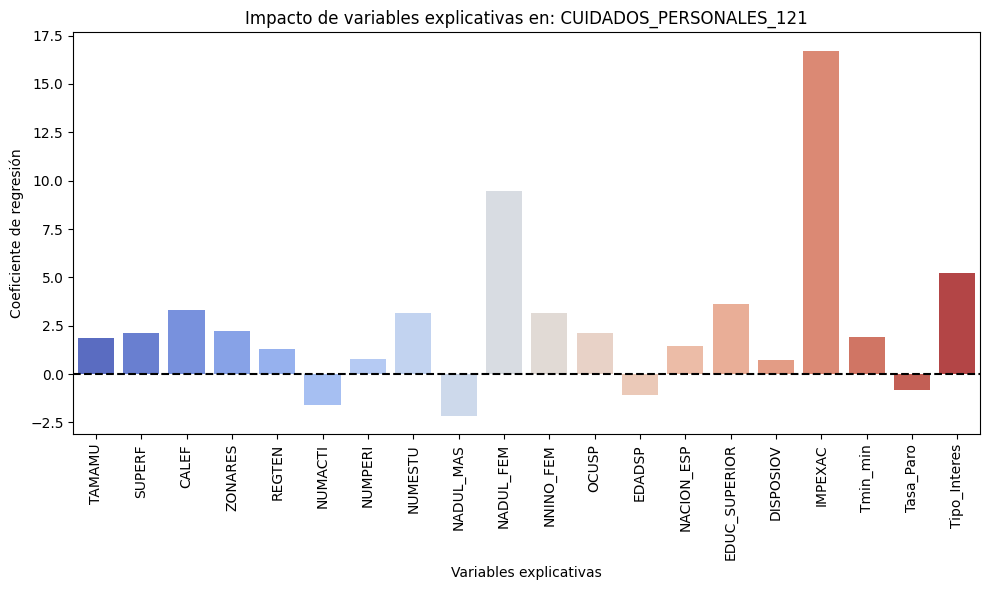

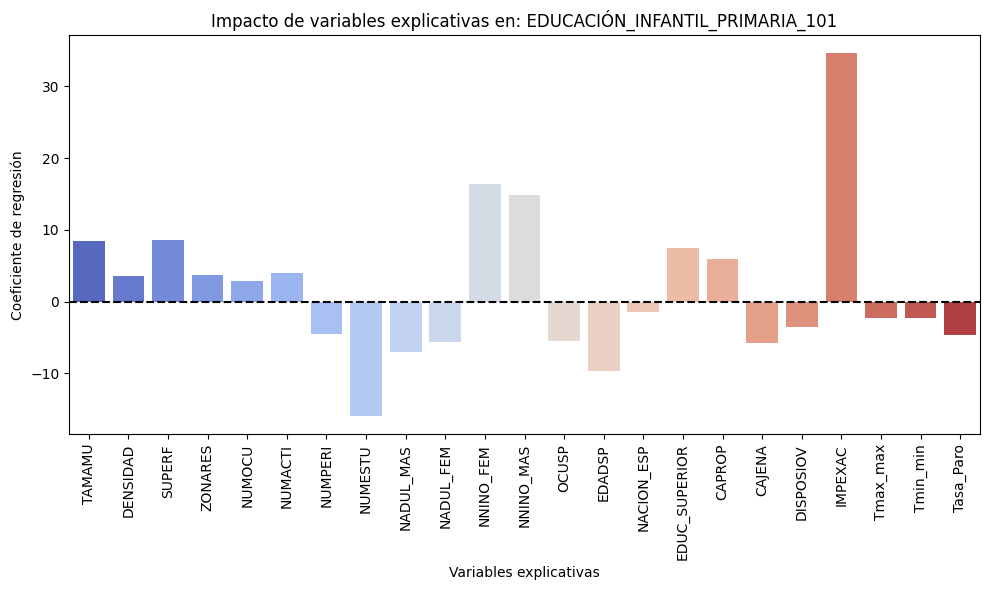

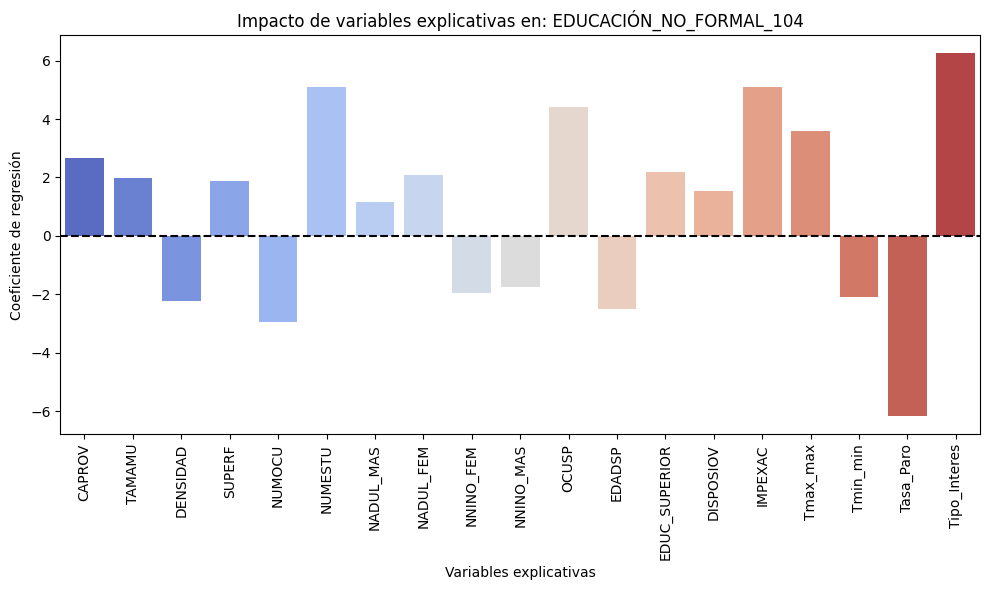

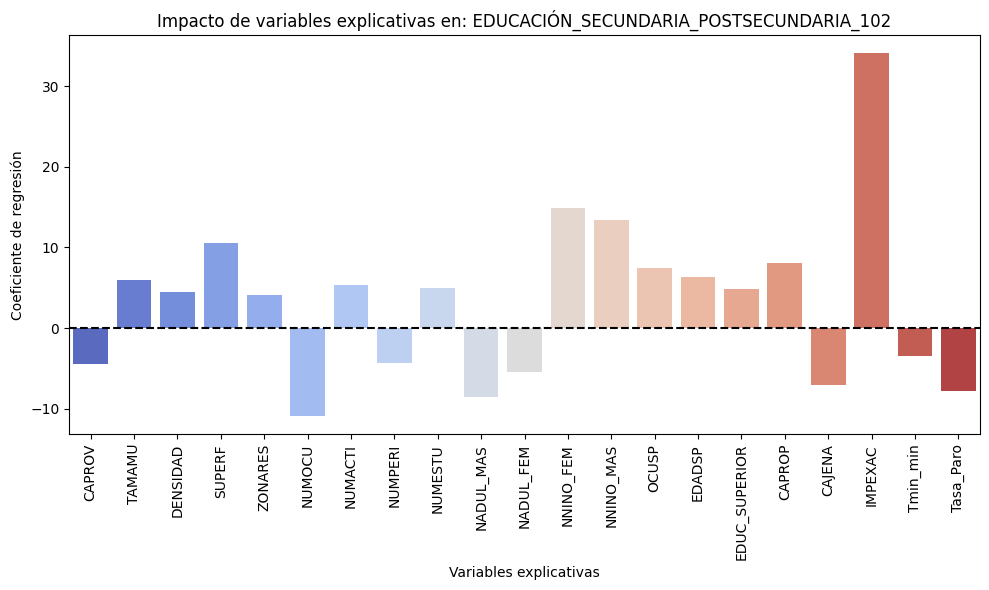

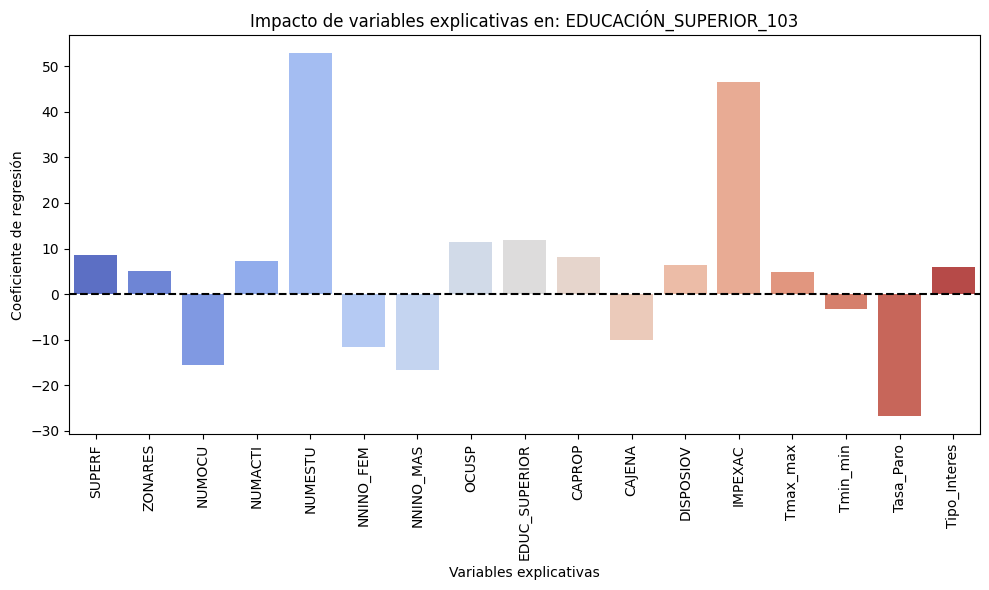

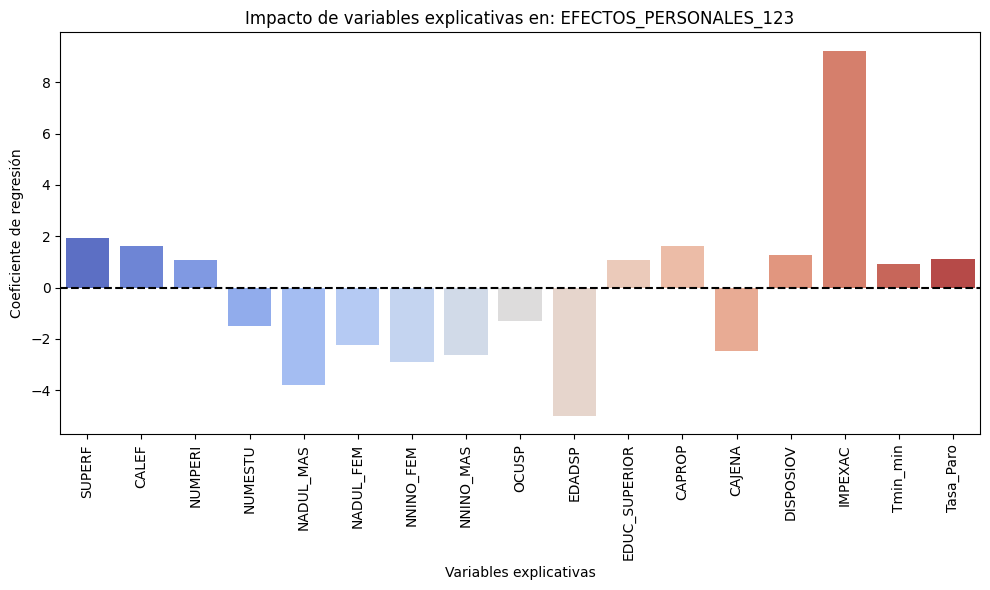

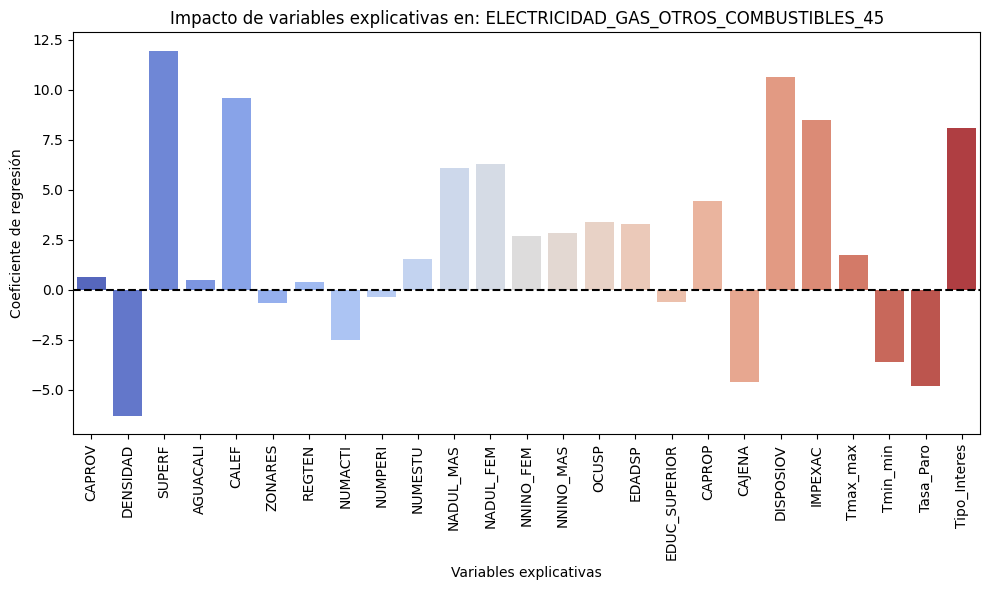

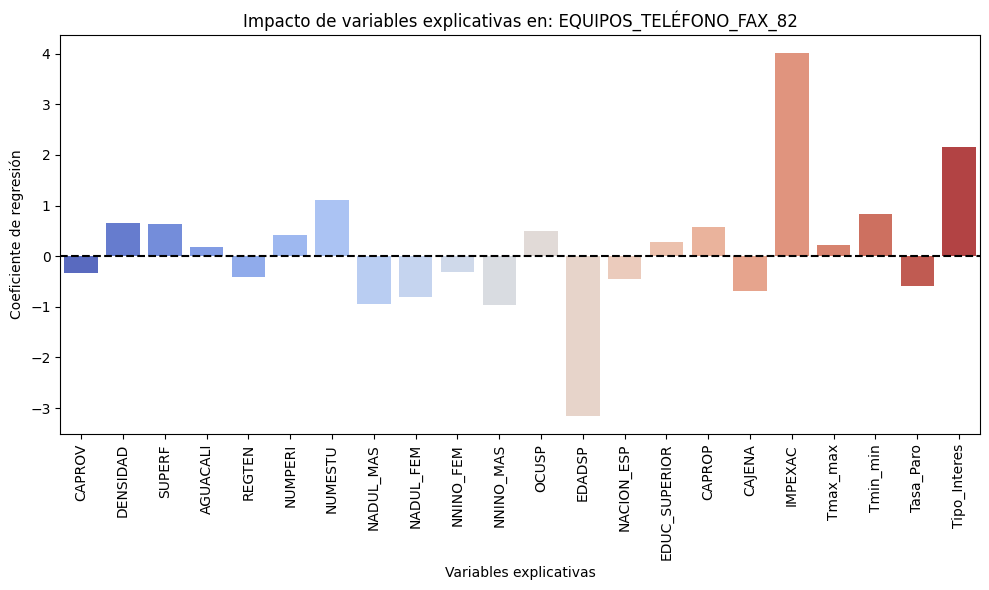

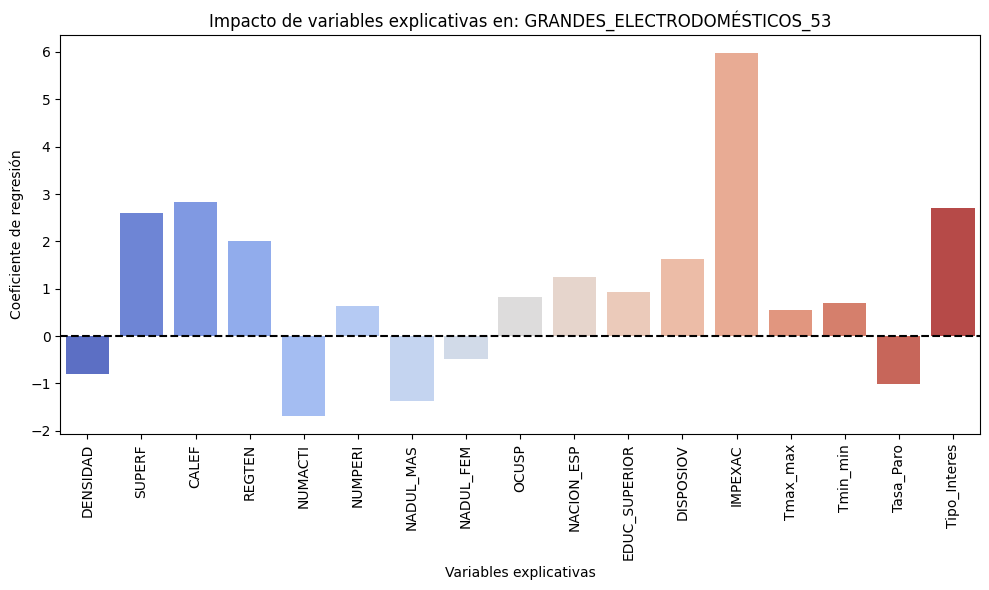

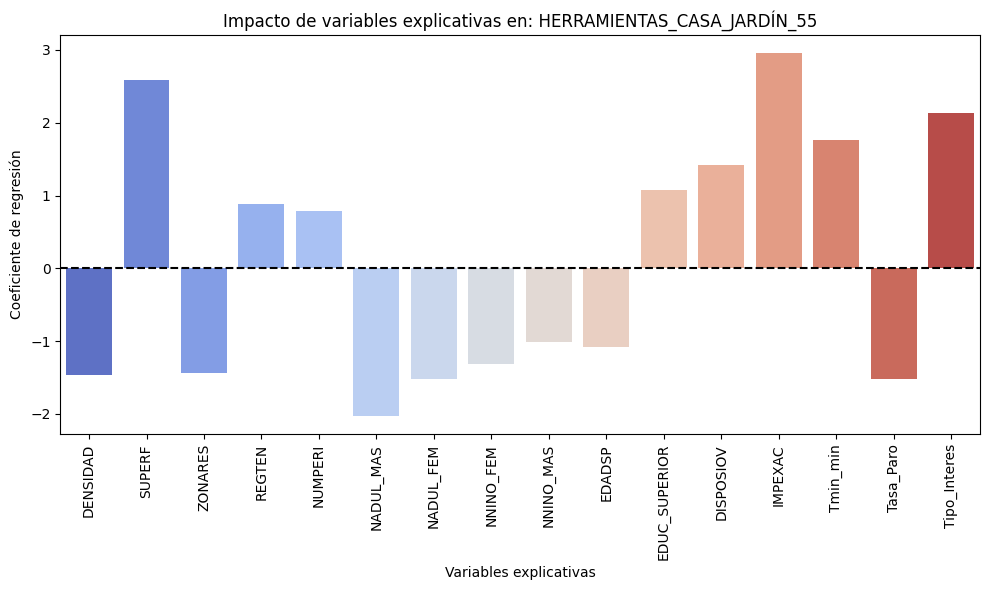

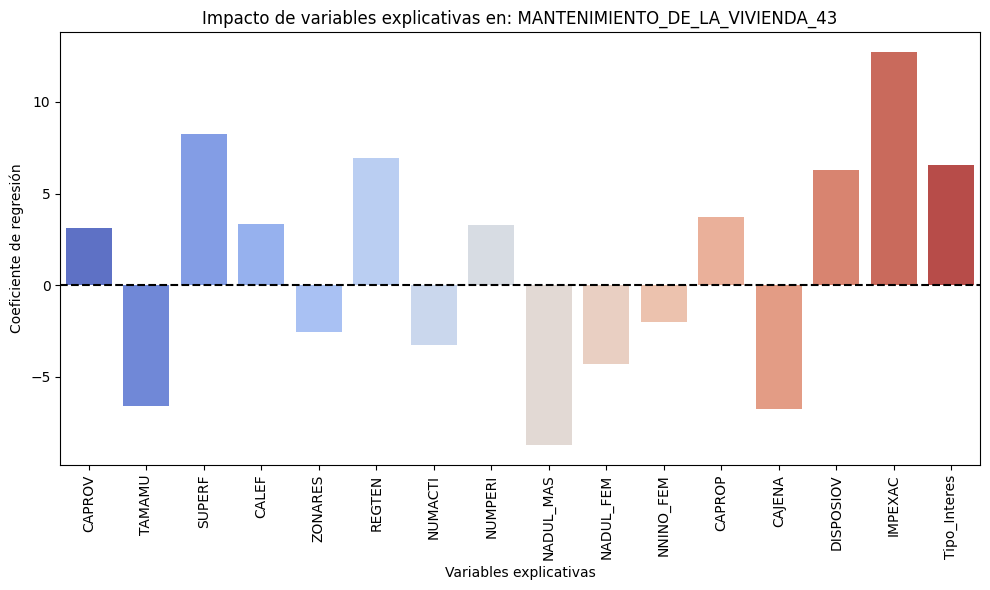

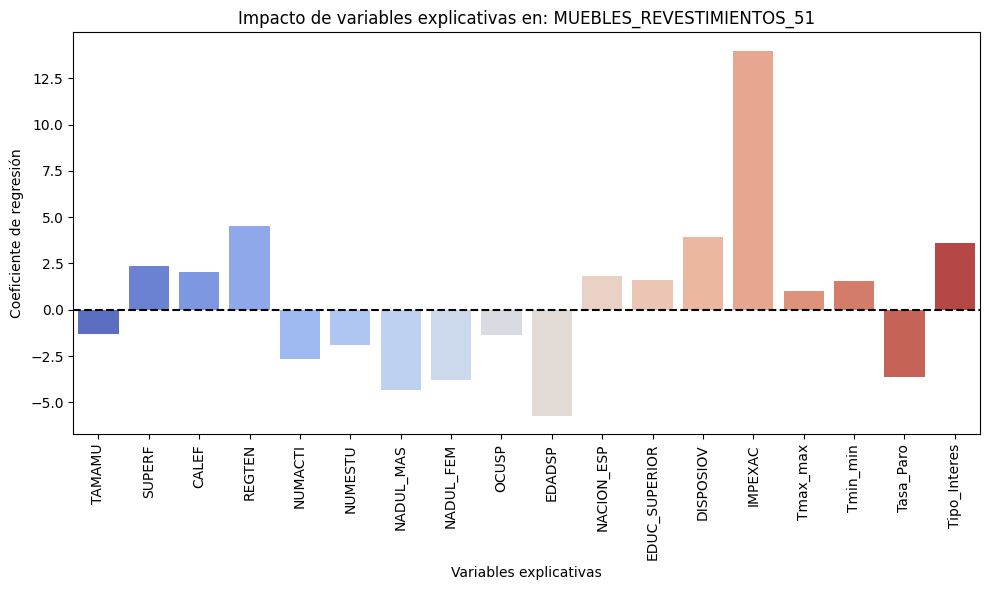

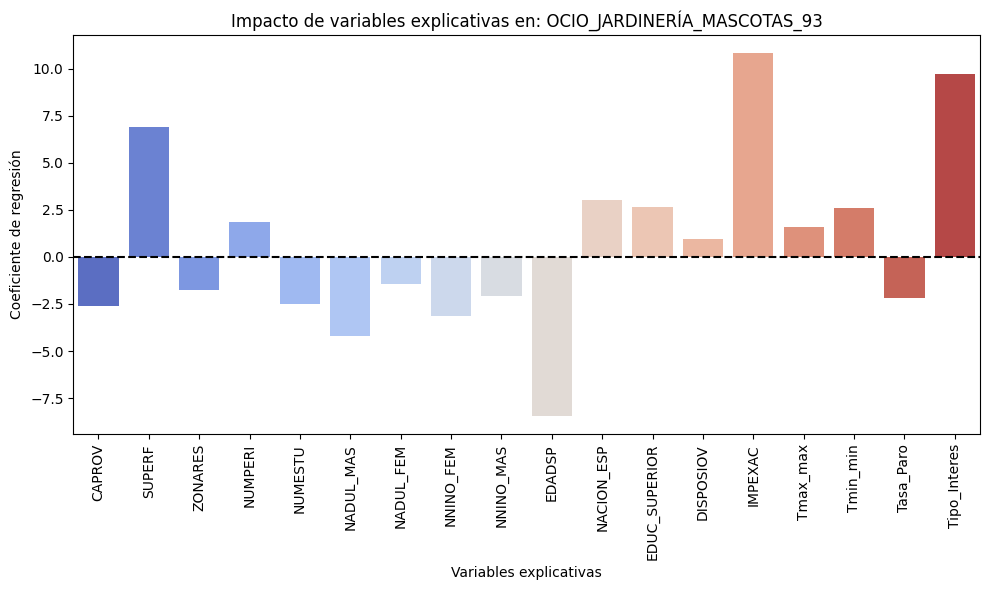

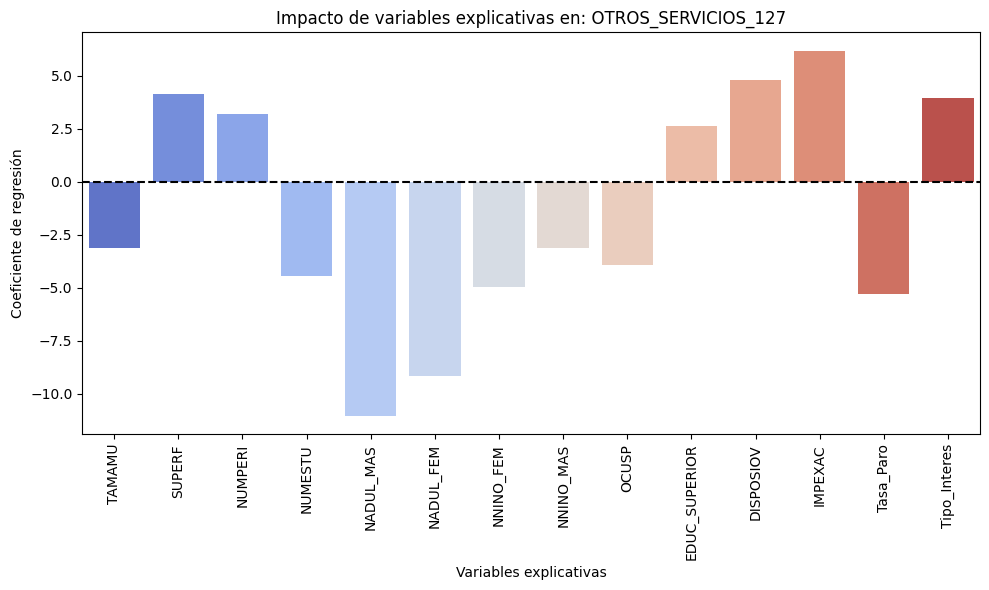

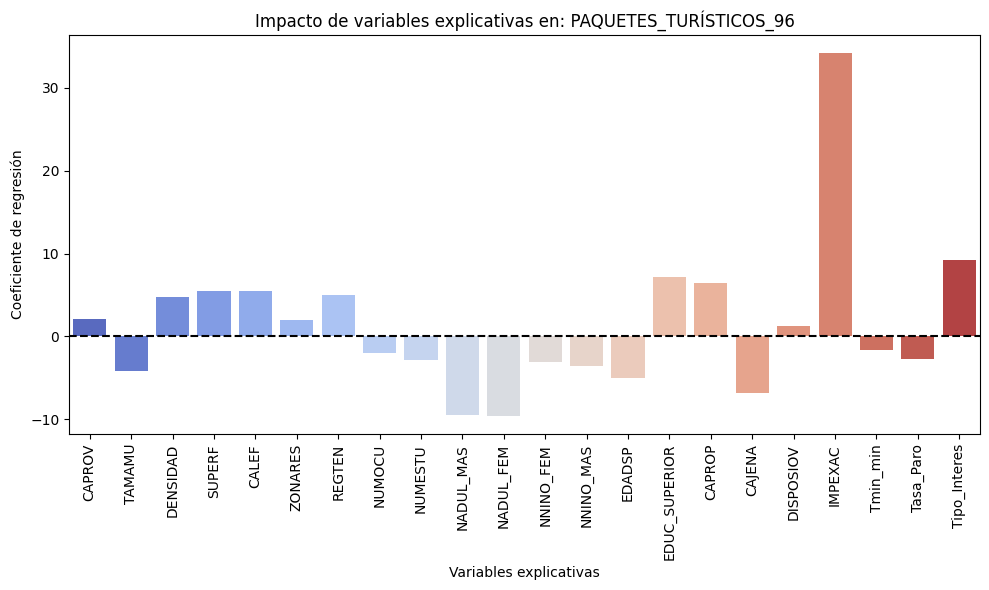

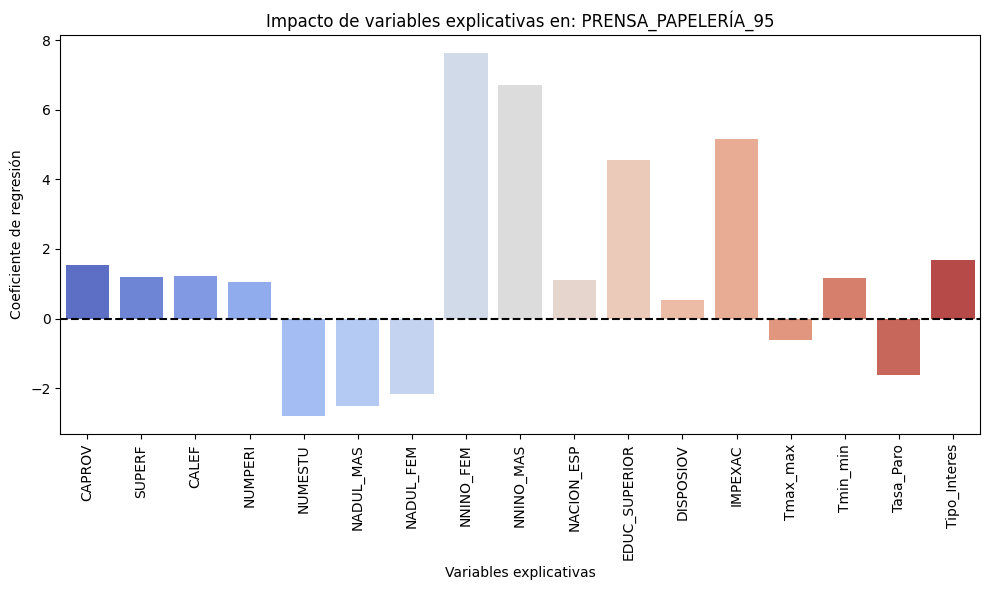

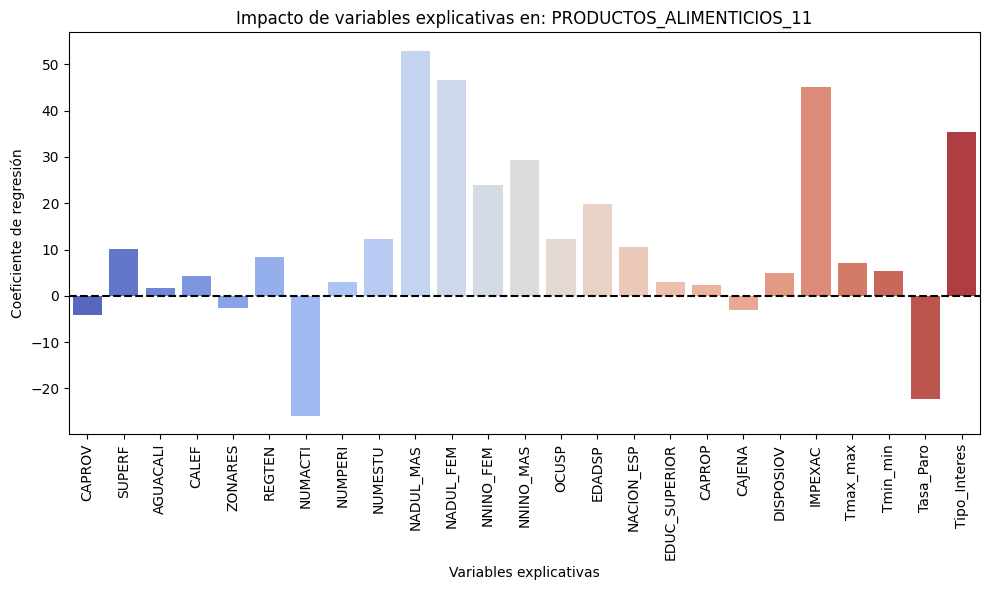

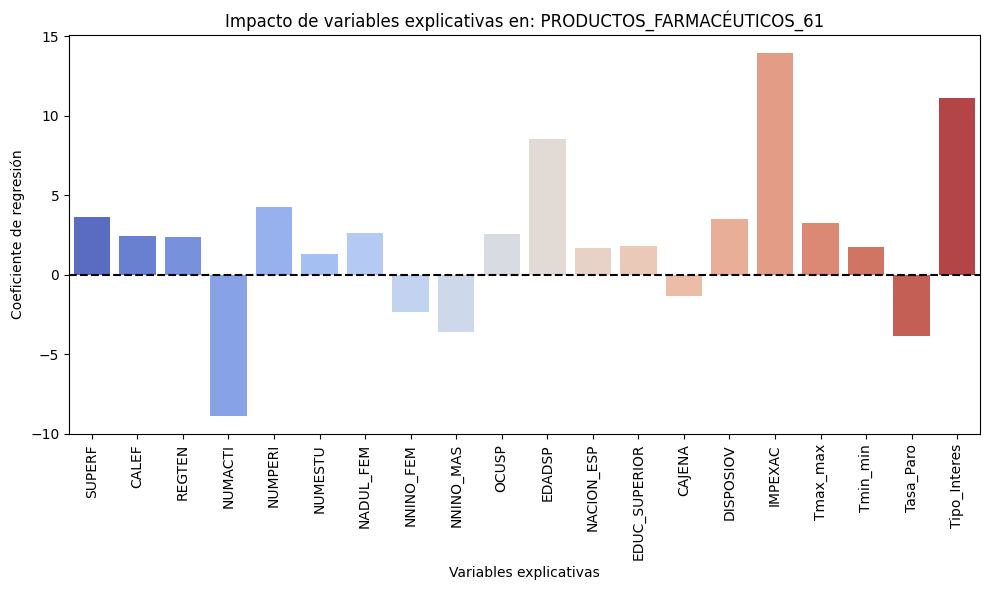

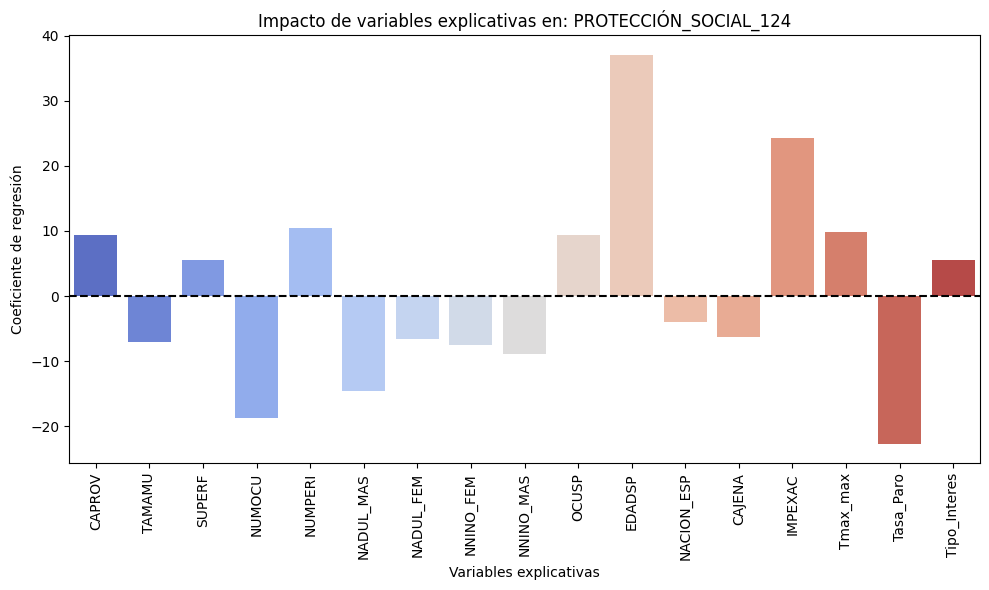

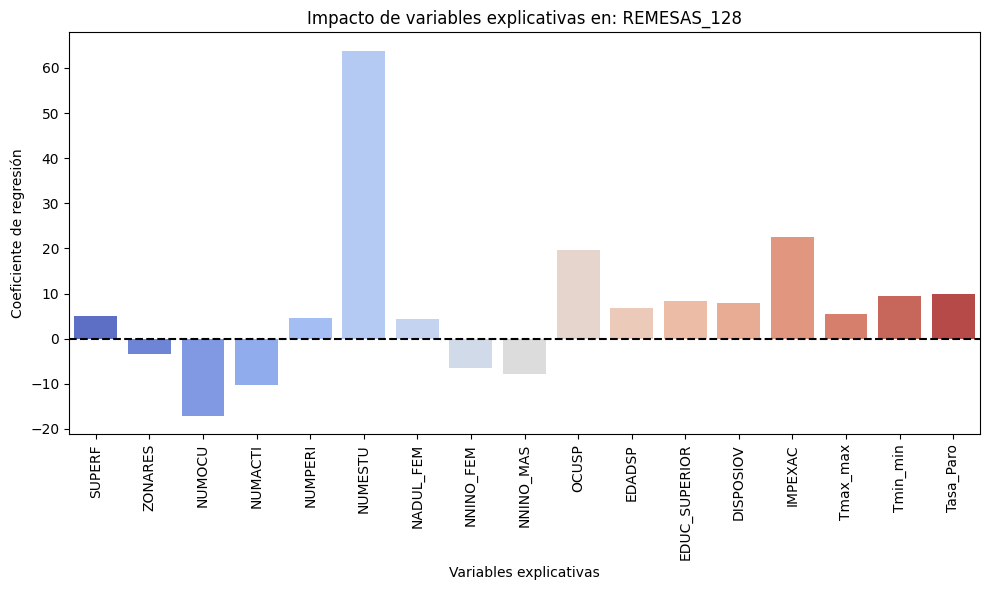

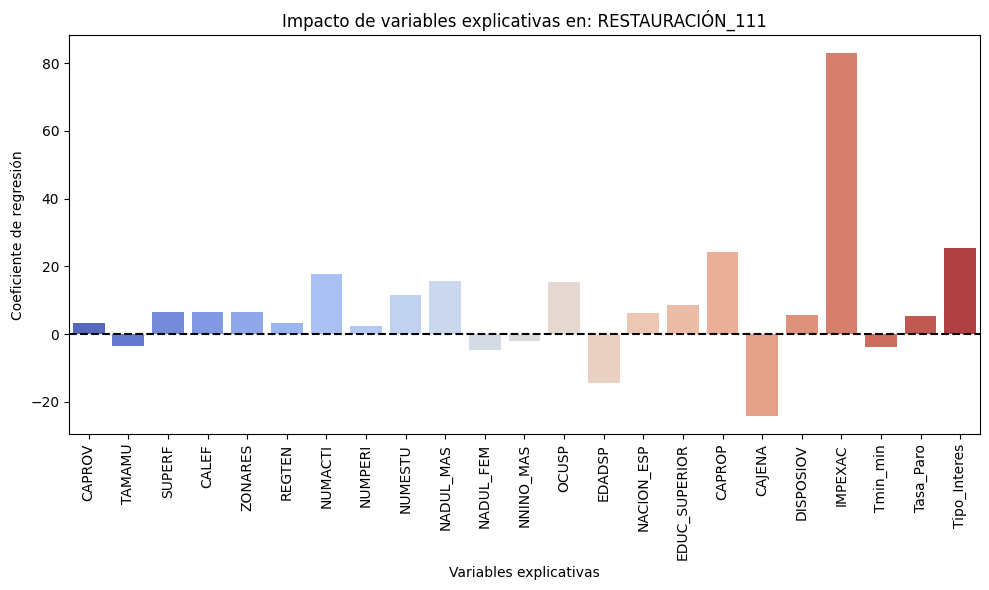

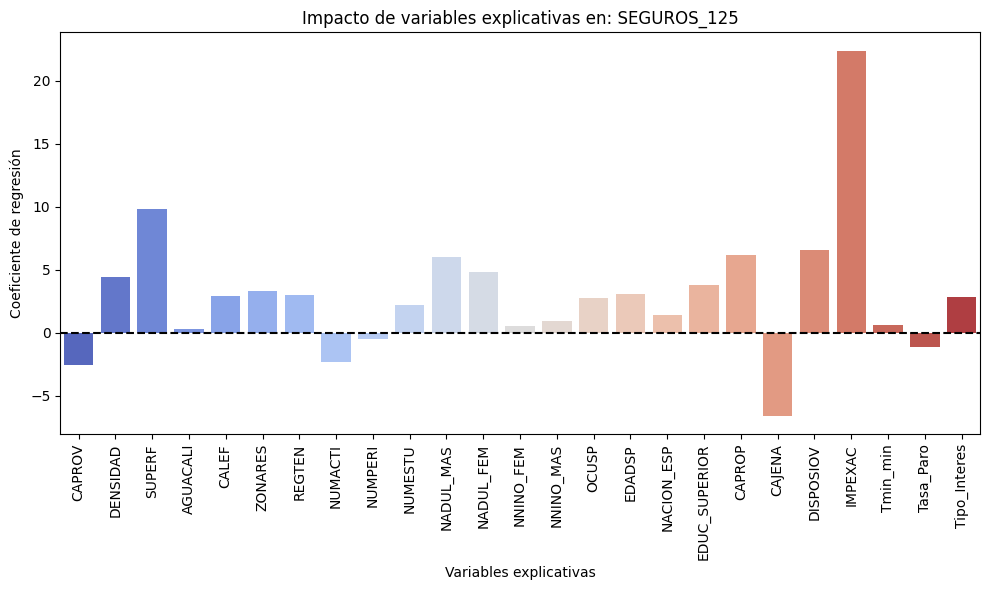

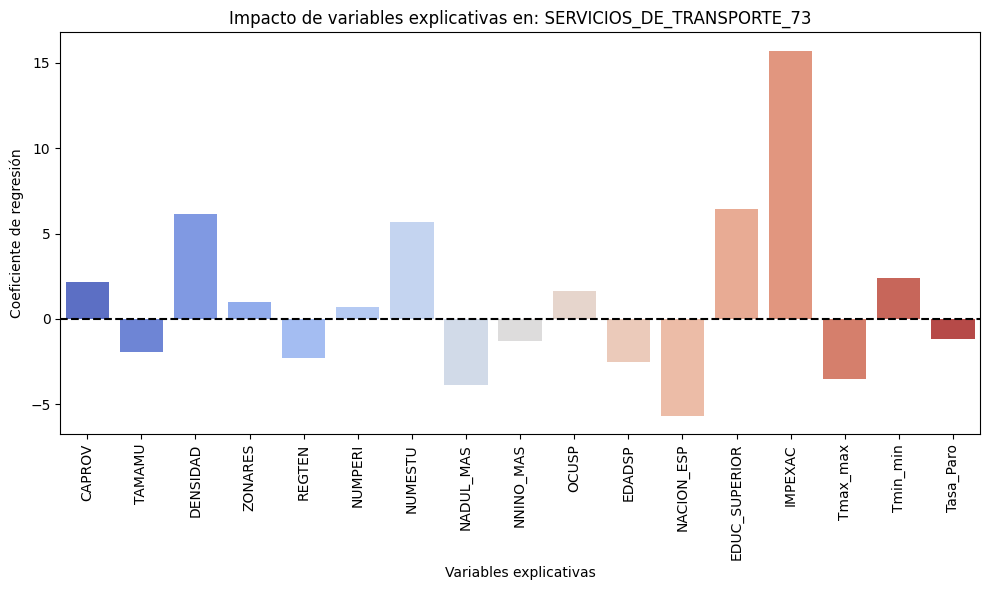

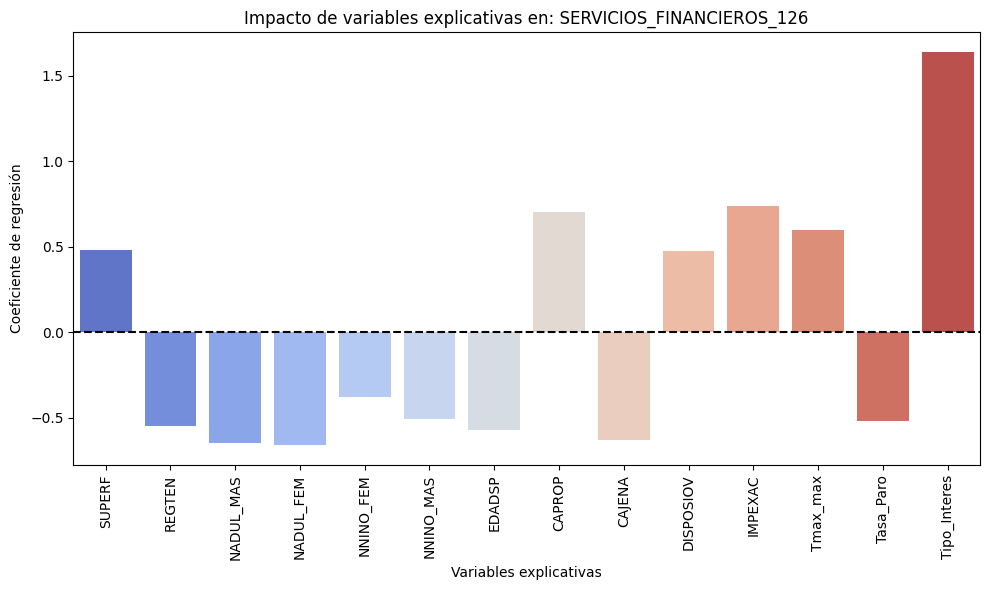

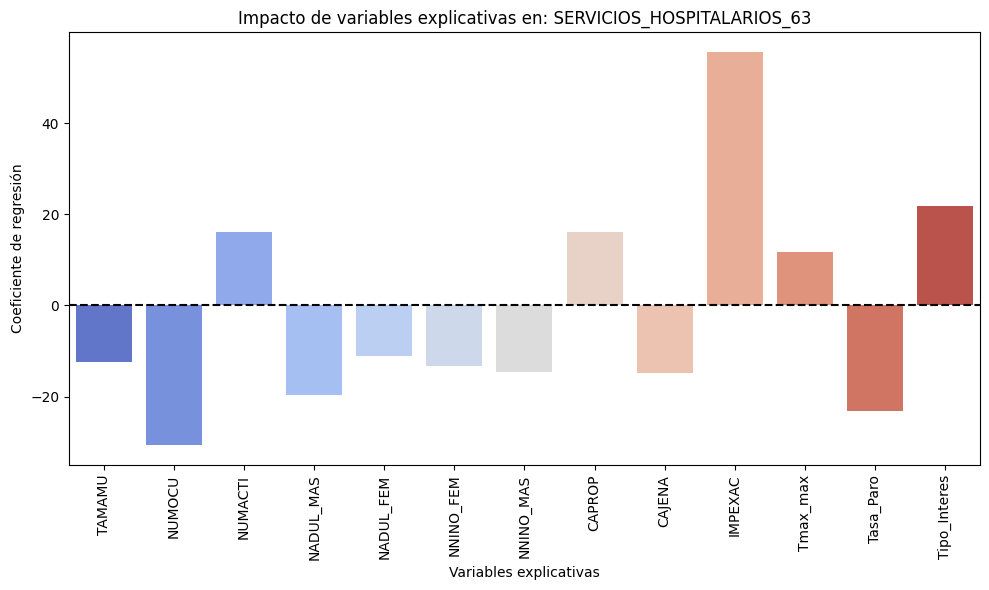

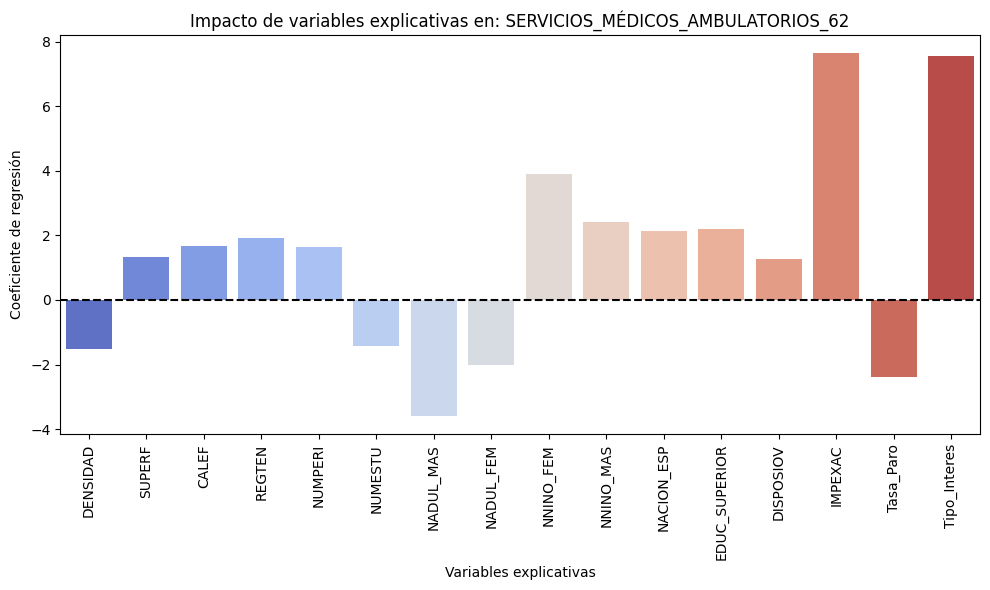

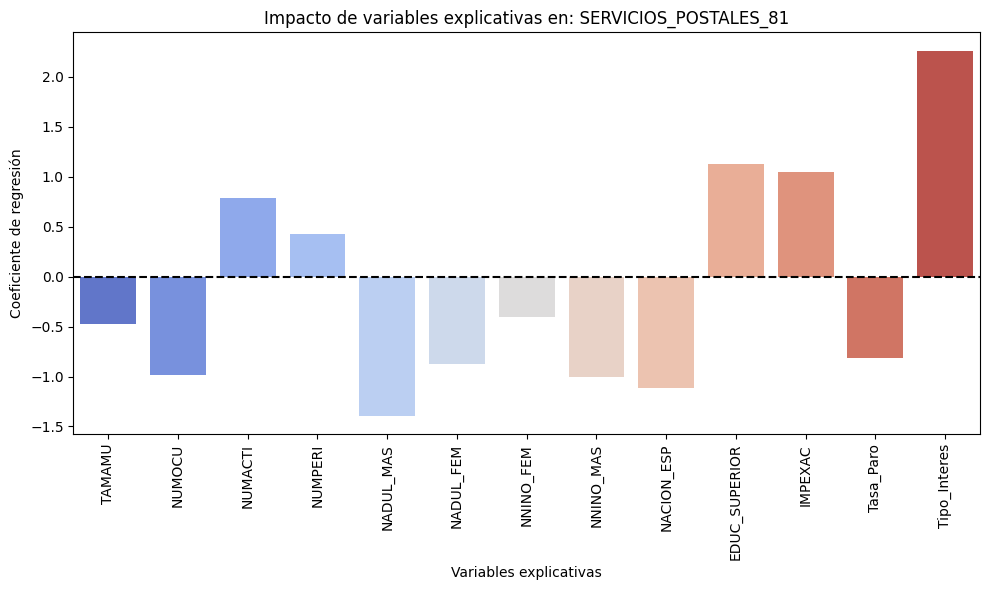

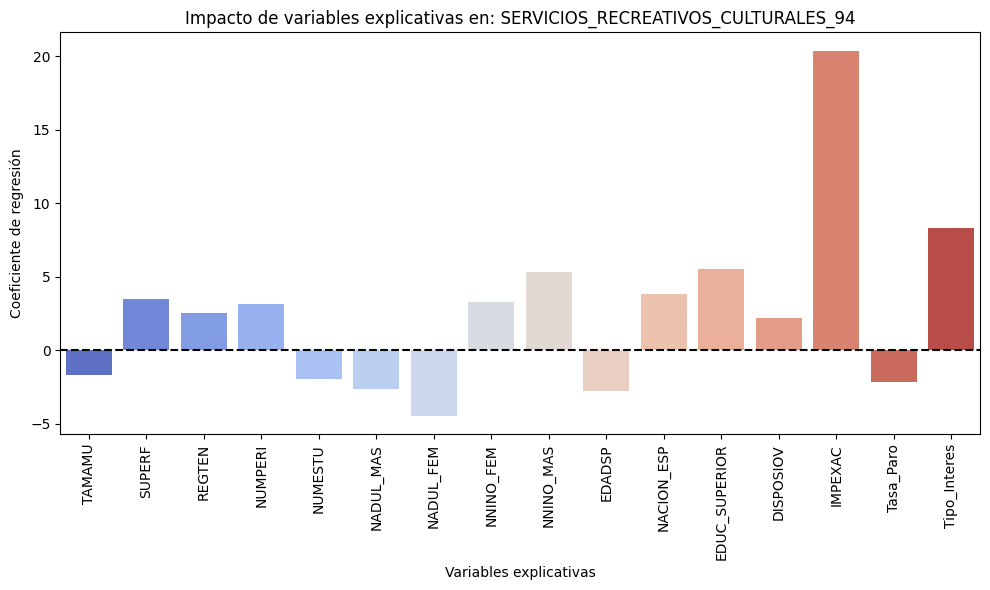

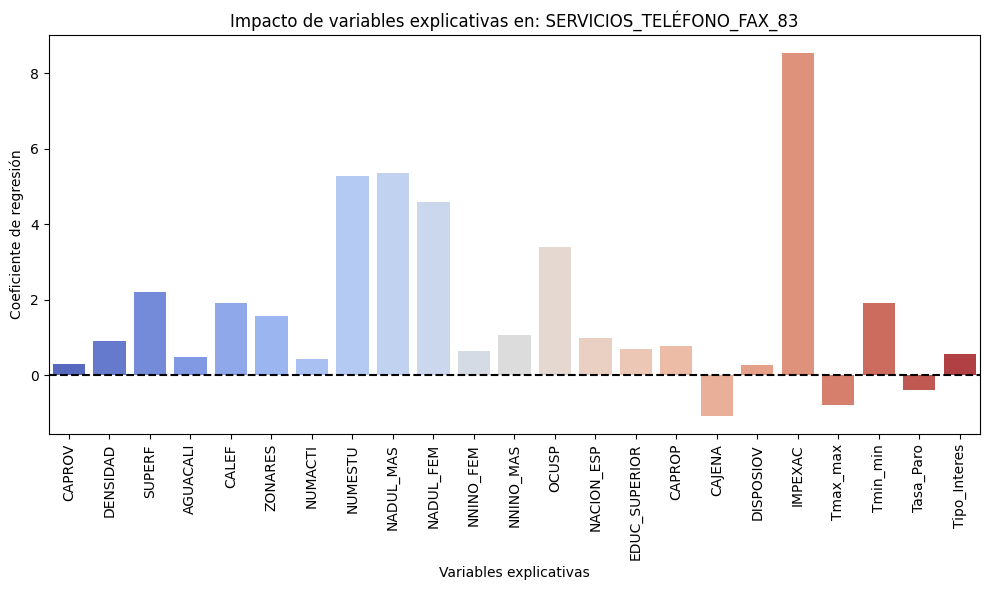

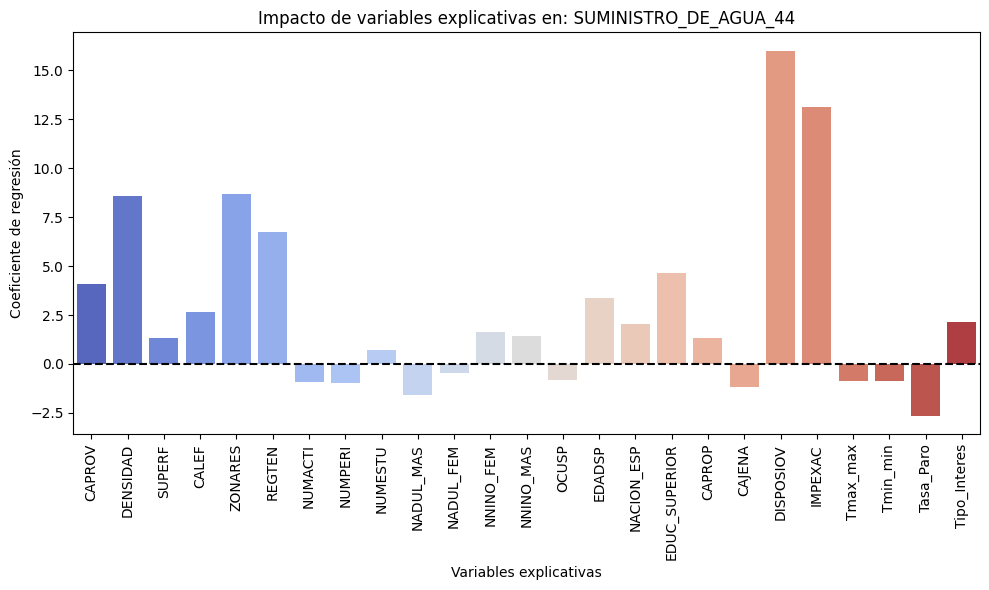

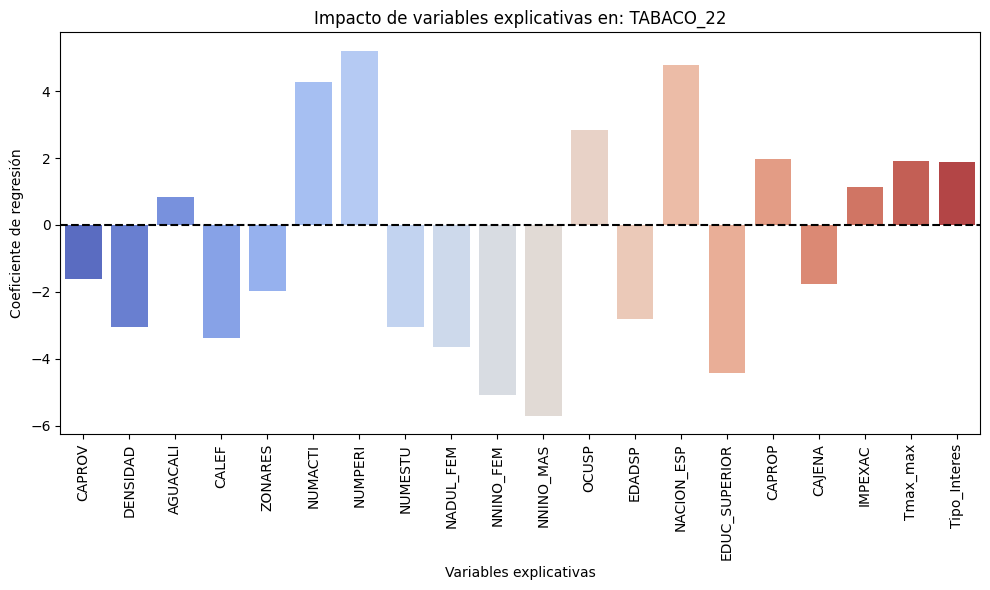

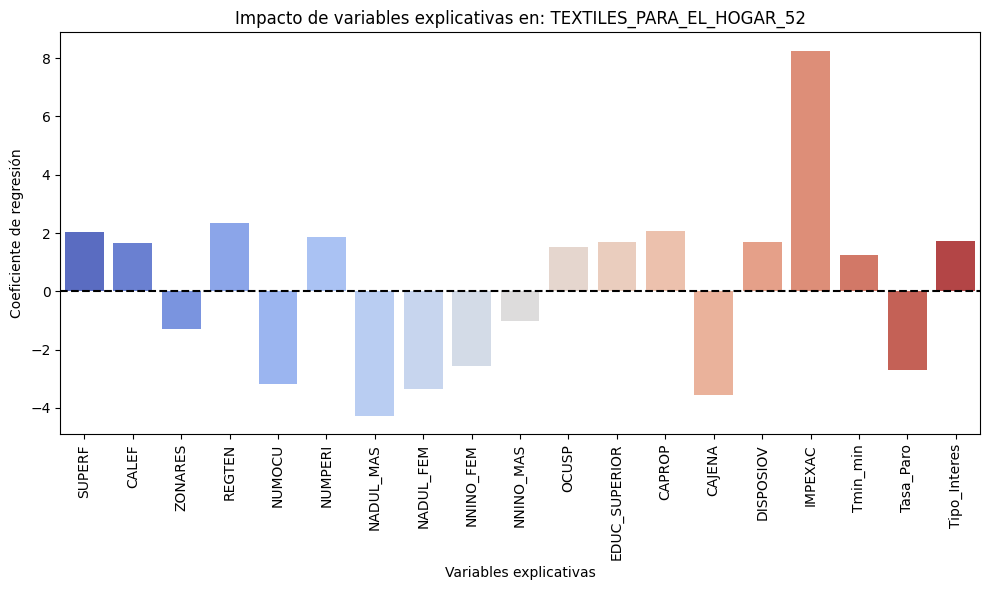

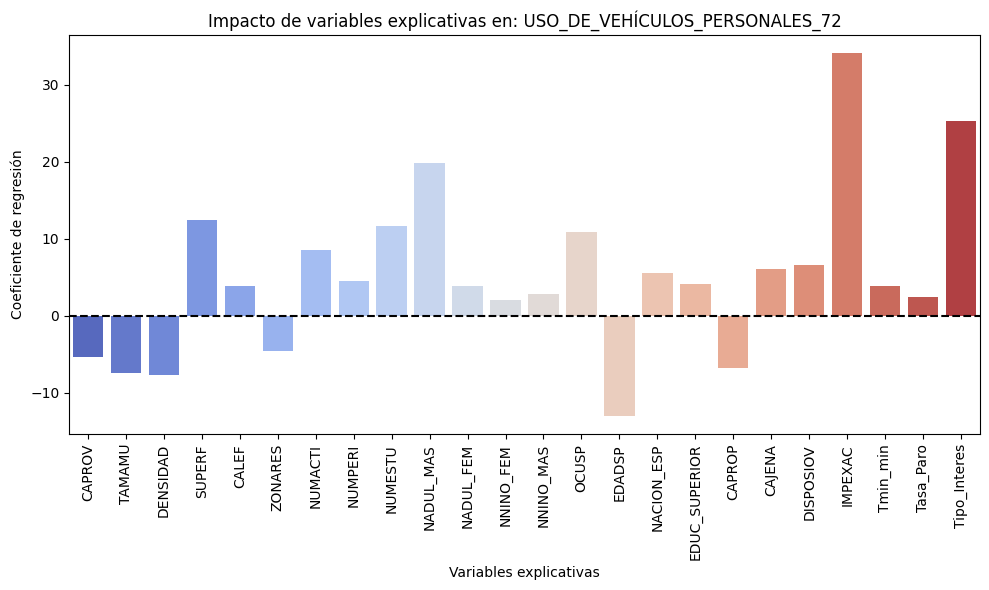

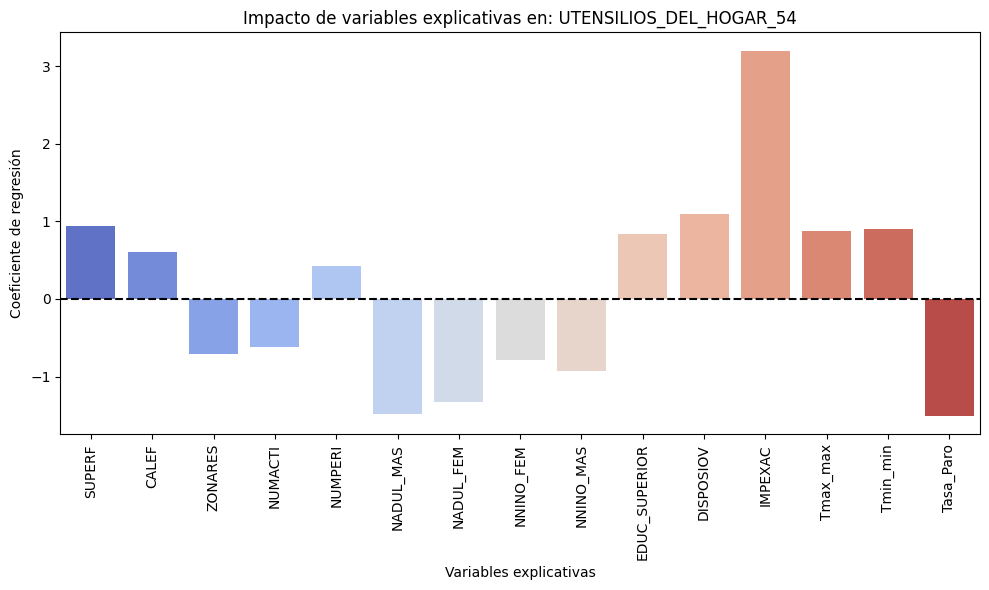

In [10]:
coef_df_without_const = coef_df[~coef_df["Variable"].str.contains("const")]

plot_coefficients_per_category(coef_df_without_const)

## 📐 Interpretación de un Modelo de Regresión Lineal Múltiple Normalizado

### 🔄 ¿Qué significa "normalizado"?

Cuando se normaliza un modelo, las variables se transforman para que tengan:

- **Media = 0**
- **Desviación estándar = 1**

Esta normalización se aplica a las variables explicativas (X), y opcionalmente también a la variable dependiente (y).

---

### 🎯 ¿Cómo se interpretan los coeficientes?

En un modelo normalizado, **los coeficientes se interpretan en términos de desviaciones estándar**:

> Un coeficiente indica cuántas desviaciones estándar cambia la variable dependiente por cada desviación estándar de cambio en la variable independiente, manteniendo las demás constantes.

---

### 💡 Ejemplo de interpretación

- Si el coeficiente de `IMPEXAC` es **+1.2**:
  - Entonces, **un aumento de 1 desviación estándar en los ingresos (`IMPEXAC`)** se asocia con un aumento de **1.2 desviaciones estándar en el gasto mensual**.

- Si el coeficiente de `NUMESTU` es **-0.5**:
  - Entonces, **un aumento de 1 desviación estándar en el número de estudiantes** se asocia con una **disminución de 0.5 desviaciones estándar en el gasto mensual**.

---

### ✅ Ventajas de la normalización

- Permite **comparar directamente el peso relativo de cada variable** en el modelo.
- Evita que variables con escalas más grandes dominen el modelo por su magnitud.
- Es útil en modelos con muchas variables heterogéneas (e.g. edad, ingresos, tamaño del hogar, etc.).

---

### ⚠️ Consideraciones

- Los coeficientes ya no están en unidades interpretables (euros, años, personas...).
- Solo tiene sentido si se desea analizar **la importancia relativa** de las variables, no el efecto real en magnitudes absolutas.


### Vemos un mapa de calor con el impacto real de cada variable en cada supercategoría

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_heatmap_of_coefficients(coefficients_df):
    """
    Muestra un heatmap legible de los coeficientes significativos por variable y código de supercategoría,
    ordenando los códigos de categoría de forma numérica.
    """
    # Extraer código numérico de categoría (última parte del nombre)
    coefficients_df["Codigo_Categoria"] = coefficients_df["Categoría_Gasto"].str.extract(r'_(\d+)$')[0]

    # Crear tabla resumen pivotando por código
    summary = coefficients_df.pivot_table(
        index="Variable",
        columns="Codigo_Categoria",
        values="Coeficiente"
    )

    # Ordenar columnas numéricamente
    sorted_columns = sorted(summary.columns, key=lambda x: int(x))
    summary = summary[sorted_columns]

    # Crear el heatmap
    plt.figure(figsize=(16, 10))
    sns.heatmap(
        summary,
        cmap="coolwarm",
        center=0,
         vmin=-75,
        vmax=75,
        linewidths=0.5,
        linecolor="grey",
        cbar_kws={"label": "Coeficiente"},
        annot=True,
        fmt=".1f",
        annot_kws={"size": 8}
    )

    plt.title("Coeficientes significativos (p < 0.05) por variable y categoría", fontsize=14, pad=20)
    plt.xlabel("Código de Categoría de Gasto", fontsize=12)
    plt.ylabel("Variable", fontsize=12)
    plt.xticks(rotation=45, ha="right")
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()


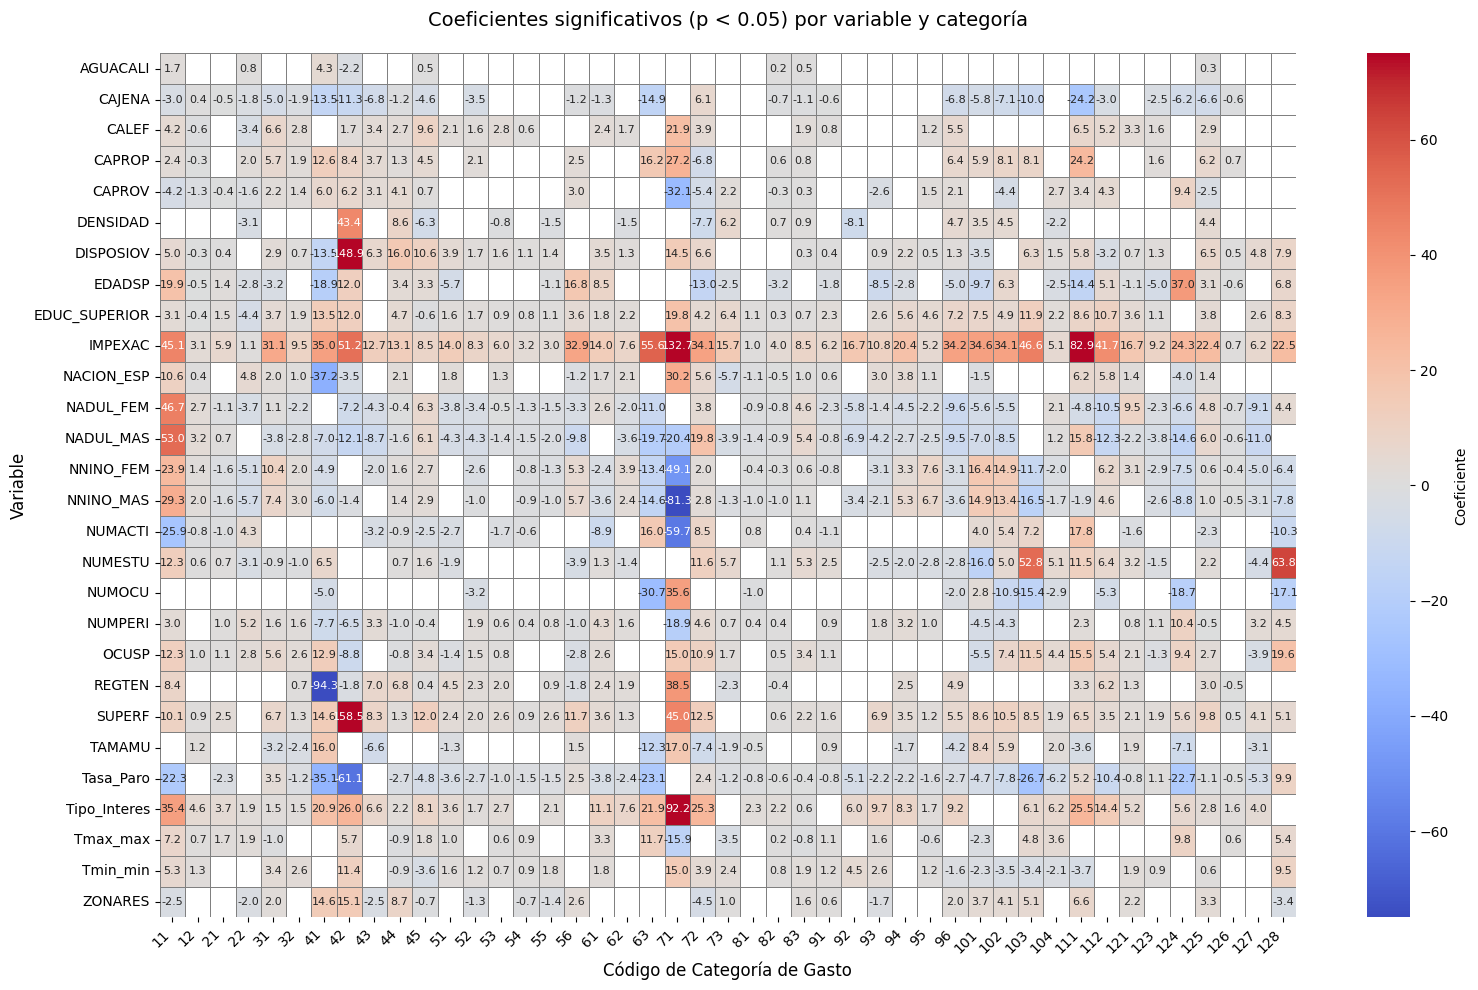

In [20]:
plot_heatmap_of_coefficients(coef_df)

In [13]:
# Convert the coefficients DataFrame to a more readable format
coef_df_pivot = coef_df.pivot(index="Variable", columns="Categoría_Gasto", values="Coeficiente")
coef_df_pivot

Categoría_Gasto  ALOJAMIENTO_112  ALQUILERES_IMPUTADOS_DE_LA_VIVIENDA_42  \
Variable                                                                   
AGUACALI                     NaN                               -2.232640   
CAJENA                 -2.999125                              -11.285056   
CALEF                   5.215742                                1.688684   
CAPROP                       NaN                                8.437651   
CAPROV                  4.296303                                6.232605   
DENSIDAD                     NaN                               43.410473   
DISPOSIOV              -3.169008                              148.879554   
EDADSP                  5.125286                               12.025043   
EDUC_SUPERIOR          10.721410                               11.972619   
IMPEXAC                41.650349                               51.213681   
NACION_ESP              5.797729                               -3.532561   
NADUL_FEM             -10.538228                               -7.155722   
NADUL_MAS             -12.272472                              -12.097888   
NNINO_FEM               6.212478                                     NaN   
NNINO_MAS               4.626917                               -1.381282   
NUMACTI                      NaN                                     NaN   
NUMESTU                 6.409075                                     NaN   
NUMOCU                 -5.323261                                     NaN   
NUMPERI                      NaN                               -6.459679   
OCUSP                   5.373743                               -8.816515   
REGTEN                  6.221020                               -1.819616   
SUPERF                  3.535004                              158.542959   
TAMAMU                       NaN                                     NaN   
Tasa_Paro             -10.372744                              -61.123943   
Tipo_Interes           14.376243                               25.959506   
Tmax_max                     NaN                                5.665144   
Tmin_min                     NaN                               11.359185   
ZONARES                      NaN                               15.122801   

Categoría_Gasto  ALQUILERES_REALES_DE_LA_VIVIENDA_41  ARTÍCULOS_DE_VESTIR_31  \
Variable                                                                       
AGUACALI                                    4.309629                     NaN   
CAJENA                                    -13.486200               -4.969722   
CALEF                                            NaN                6.577747   
CAPROP                                     12.629046                5.726616   
CAPROV                                      6.041583                2.150317   
DENSIDAD                                         NaN                     NaN   
DISPOSIOV                                 -13.535882                2.913024   
EDADSP                                    -18.885432               -3.162632   
EDUC_SUPERIOR                              13.500587                3.652061   
IMPEXAC                                    35.020013               31.138781   
NACION_ESP                                -37.241344                2.033365   
NADUL_FEM                                        NaN                1.068033   
NADUL_MAS                                  -6.977838               -3.780413   
NNINO_FEM                                  -4.888996               10.364963   
NNINO_MAS                                  -5.990542                7.370434   
NUMACTI                                          NaN                     NaN   
NUMESTU                                     6.521943               -0.927863   
NUMOCU                                     -5.012844                     NaN   
NUMPERI                                    -7.702887                1.607129   
OCUSP                                  

# Análisis de Coeficientes OLS por Categoría de Gasto

Este análisis se basa en la matriz de coeficientes de modelos OLS aplicados a distintas **categorías de gasto**. Cada columna representa una categoría, y cada fila es una variable explicativa. Los valores indican la **magnitud y dirección del impacto** de esa variable sobre el gasto, manteniendo constantes las demás.

---

## 📊 Interpretación General

- **Coeficientes positivos**: sugieren que un aumento en la variable explicativa está asociado con un mayor gasto en esa categoría.
- **Coeficientes negativos**: indican que un aumento en la variable reduce el gasto en esa categoría.
- **Valores faltantes (`NaN`)**: la variable no resultó significativa o fue eliminada por multicolinealidad.

---

## 🔍 1. Variables con impacto sistemático

### 🏦 `Tipo_Interes`
- Presente en casi todas las categorías con coeficientes positivos.
- Altamente significativo en:
  - `ALQUILERES_IMPUTADOS`: +26.06
  - `ALQUILERES_REALES`: +20.54
  - `SERVICIOS_HOSPITALARIOS`: +21.85
- 📌 **Interpretación**: un aumento de los tipos de interés se asocia con un mayor gasto imputado y real en vivienda. Puede reflejar tanto un mayor coste de oportunidad de la vivienda como una mayor presión económica en hogares con hipoteca.

### 📉 `Tasa_Paro`
- Fuertemente negativo en gastos estructurales:
  - `ALQUILERES_IMPUTADOS`: -61.64
  - `ALQUILERES_REALES`: -34.90
- 📌 **Interpretación**: el desempleo tiene un impacto claro sobre el gasto, reduciendo notablemente el consumo en vivienda y otras categorías.

---

## 👨‍👩‍👧‍👦 2. Estructura del Hogar y Demografía

### `NUMPERI` (número de personas en el hogar)
- Negativo en:
  - `ALQUILERES_REALES`: -7.56
  - `ALQUILERES_IMPUTADOS`: -6.33
- Positivo en:
  - `CALZADO`: +1.68
  - `VEHÍCULOS_PERSONALES`: +4.45
- 📌 **Interpretación**: hogares grandes diluyen el gasto individual en vivienda, pero aumentan el consumo en necesidades grupales.

### `TAMAMU` (tamaño del municipio)
- Positivo en:
  - `ALQUILERES_IMPUTADOS`: +12.42
  - `ALQUILERES_REALES`: +16.82
  - `VEHÍCULOS_PERSONALES`: -10.47 (negativo)
- 📌 **Interpretación**: los municipios grandes implican mayor gasto en vivienda y menor dependencia del transporte privado.

### `ZONARES` (zona residencial)
- Positivo en vivienda:
  - `ALQUILERES_IMPUTADOS`: +13.51
  - `ALQUILERES_REALES`: +13.87
- 📌 **Interpretación**: residir en ciertas zonas eleva significativamente el coste (o el gasto declarado) en vivienda.

---

## 🎓 3. Educación y situación laboral

### `EDUC_SUPERIOR`
- Coeficientes altos y positivos en múltiples categorías:
  - `ALQUILERES_IMPUTADOS`: +12.08
  - `ALQUILERES_REALES`: +13.69
  - `ALOJAMIENTO`: +10.92
- 📌 **Interpretación**: mayor nivel educativo se asocia con mayor capacidad de gasto y posiblemente con patrones de consumo más intensivos.

### `OCUSP` (persona ocupada)
- Positivo en:
  - `ALQUILERES_REALES`: +13.05
  - `CALZADO`: +2.57
  - `ARTÍCULOS_DE_VESTIR`: +5.40
- 📌 **Interpretación**: el empleo está relacionado con un mayor gasto en consumo visible y vivienda.

---

## 👧👦 4. Presencia de menores

### `NNINO_FEM`, `NNINO_MAS`
- Fuertemente positivos en categorías como:
  - `ARTÍCULOS_DE_VESTIR`: +10.05 (`NNINO_FEM`)
  - `CALZADO`: +2.93 (`NNINO_MAS`)
  - `OCIO`: +3–5 puntos
- 📌 **Interpretación**: los menores impactan directamente en el consumo de ropa, calzado, ocio y educación.

---

## 🧓 5. Presencia de mayores

### `NADUL_FEM`, `NADUL_MAS`
- Tienen impactos **negativos** en muchas categorías:
  - `ALQUILERES_REALES`: -7.08 (`NADUL_MAS`)
  - `BIENES_SERVICIOS_HOGAR`: -9.81
- 📌 **Interpretación**: hogares con adultos mayores tienden a reducir el gasto, posiblemente por restricciones económicas o cambios en estilo de vida.

---

## 🌡️ 6. Clima y condiciones ambientales

### `Tmax_max`, `Tmin_min`
- Positivo en:
  - `SERVICIOS_HOSPITALARIOS`: +11.65
  - `OCIO`, `TEXTILES`, etc.
- 📌 **Interpretación**: temperaturas extremas podrían inducir mayor gasto en salud y acondicionamiento del hogar.

---

## 📦 7. Variables singulares

### `DISPOSIOV`
- Coeficiente extremadamente alto en:
  - `ALQUILERES_IMPUTADOS`: +148.87
- 📌 **Interpretación**: refleja directamente la imputación del valor de uso de la vivienda en propiedad. Muy sensible a esta variable.

### `IMPEXAC` (Índice de exclusión económica)
- Positivo en:
  - `ALQUILERES_REALES`: +34.99
  - `SERVICIOS_HOSPITALARIOS`: +55.57
- 📌 **Interpretación**: podría reflejar gasto imputado por transferencias o subsidios a hogares vulnerables.

---

## 🔚 Conclusiones Generales

1. 🔗 **El gasto en vivienda es el más sensible a las variables estructurales**: desempleo, tipos de interés, tamaño del hogar, educación y localización explican en gran medida este gasto.
2. 🛒 **El consumo en bienes no esenciales (ocio, moda, tecnología) es más volátil y menos explicado por las variables estructurales**, indicando mayor variabilidad individual.
3. 👪 **La composición del hogar tiene un peso importante**: los menores elevan el consumo, los mayores lo reducen.
4. 📍 **El territorio importa**: variables como zona residencial y tamaño del municipio alteran profundamente los patrones de gasto.
5. 🧩 **Variables como `DISPOSIOV`, `IMPEXAC` y `OCUSP` son fundamentales para entender dinámicas de vivienda y bienestar**.


In [14]:
# Save the coefficients DataFrame to a CSV file
coef_df_pivot.to_csv("../../datamarts/coeficientes_por_categoria_lineal.tsv", sep="\t", index=True)

# Save the metrics DataFrame to a CSV file
metrics_df.to_csv("../../datamarts/metricas_lineal.tsv", sep="\t", index=False)

## Como influye cada variable en las categorías de gasto

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_variable_impact_across_categories(coefficients_df):
    """
    Generates a bar chart for each significant variable showing its regression coefficient
    across all spending categories, using only the category code for clarity.
    """
    variables = coefficients_df["Variable"].unique()

    for var in variables:
        # Filter the DataFrame for the current variable
        df_var = coefficients_df[coefficients_df["Variable"] == var].copy()

        # Extract only the category code from the category name
        df_var["Category_Code"] = df_var["Categoría_Gasto"].str.extract(r'_(\d+)$')[0]

        # Sort by coefficient value
        df_var = df_var.sort_values(by="Coeficiente", ascending=False)

        # Plot
        plt.figure(figsize=(10, 6))
        sns.barplot(data=df_var, x="Category_Code", y="Coeficiente", palette="coolwarm")
        plt.axhline(0, color="black", linestyle="--")
        plt.title(f"Impact of '{var}' on Monthly Spending by Category")
        plt.xlabel("Spending Category Code")
        plt.ylabel(f"Regression Coefficient of '{var}'")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


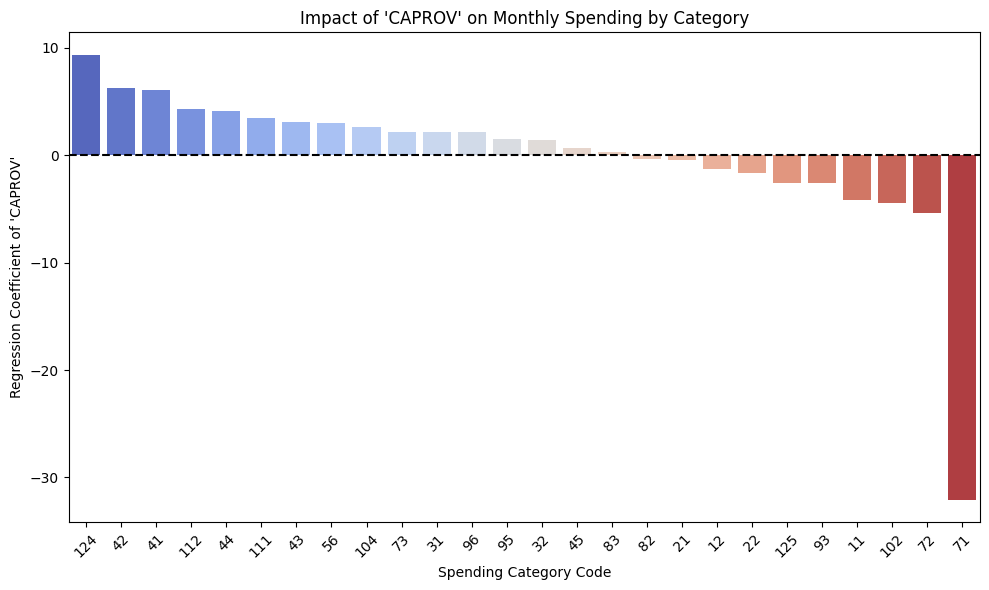

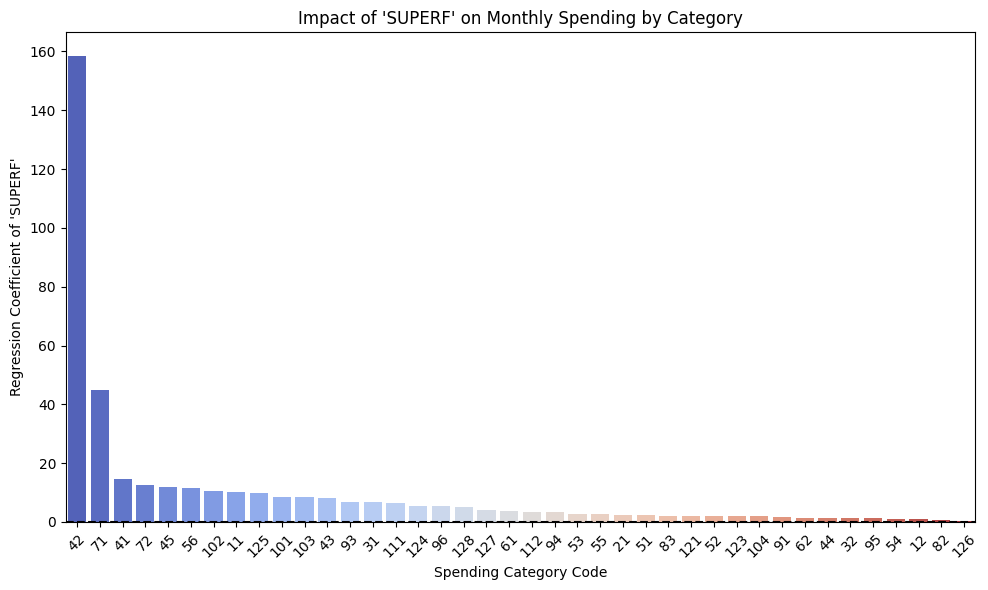

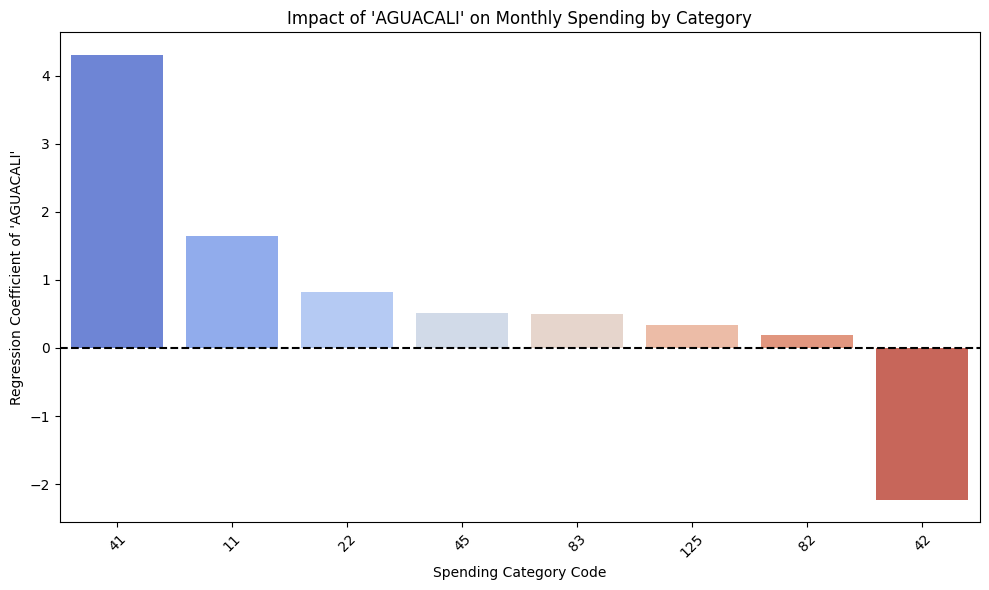

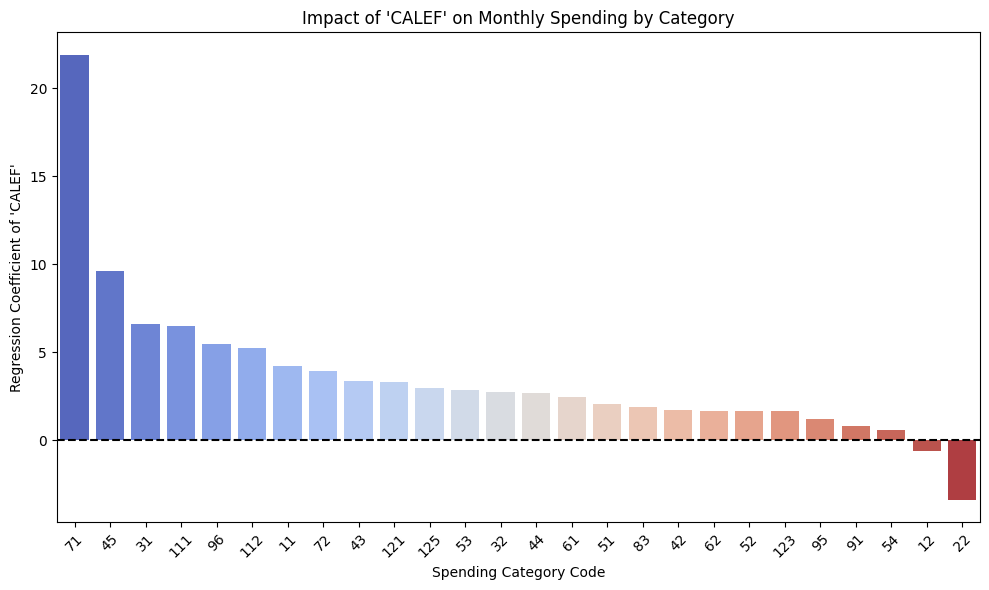

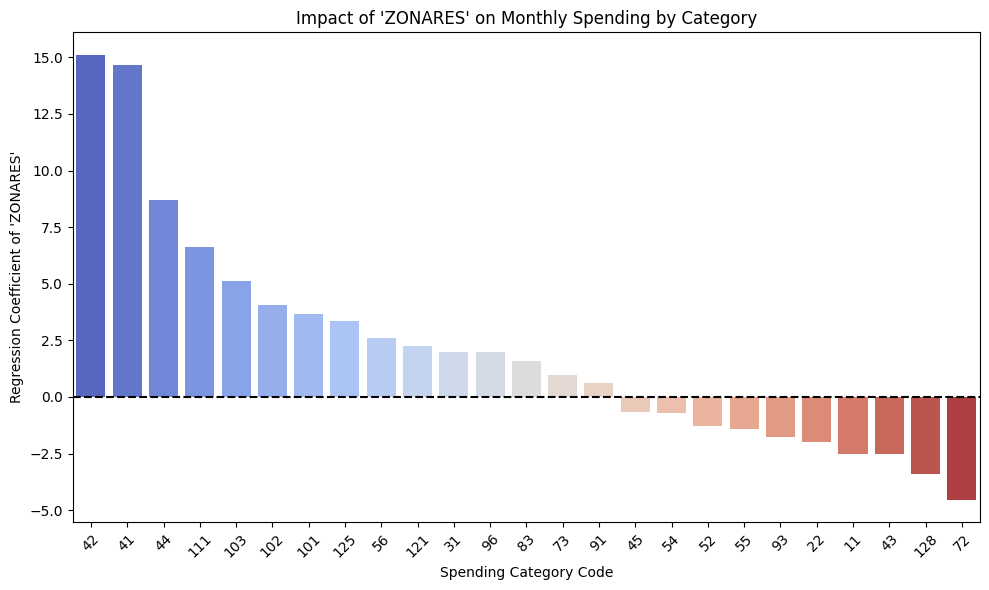

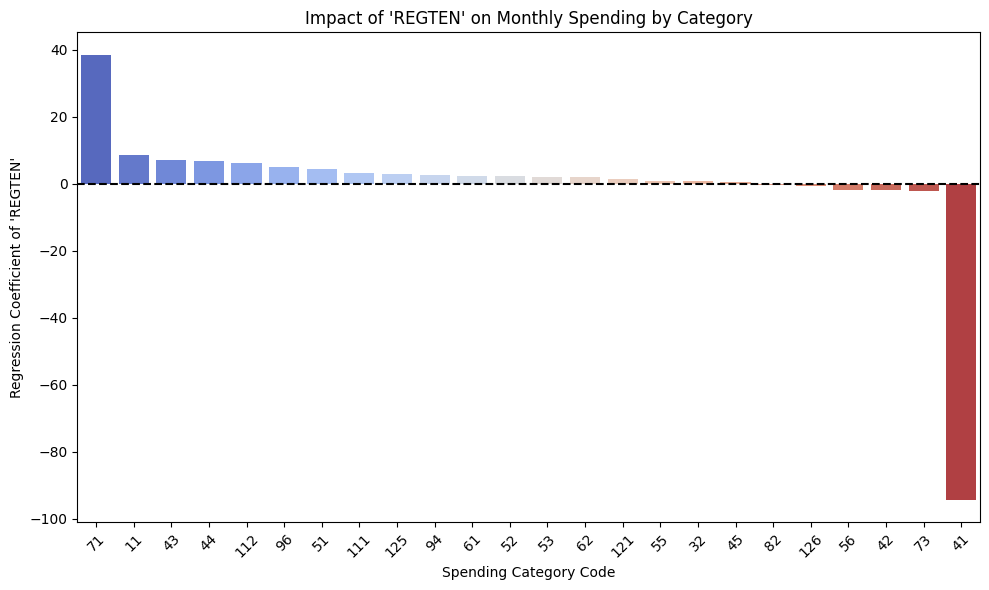

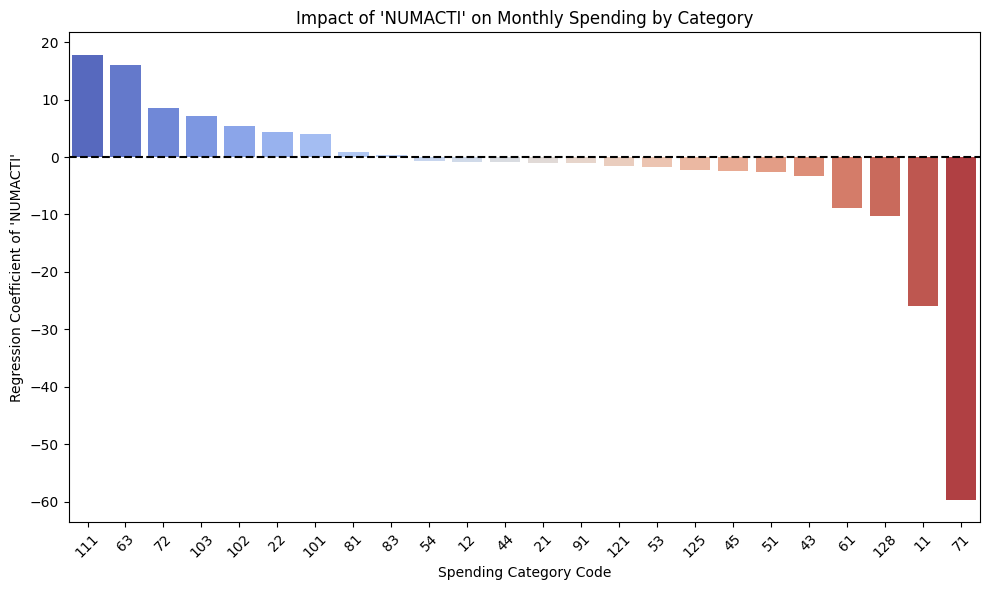

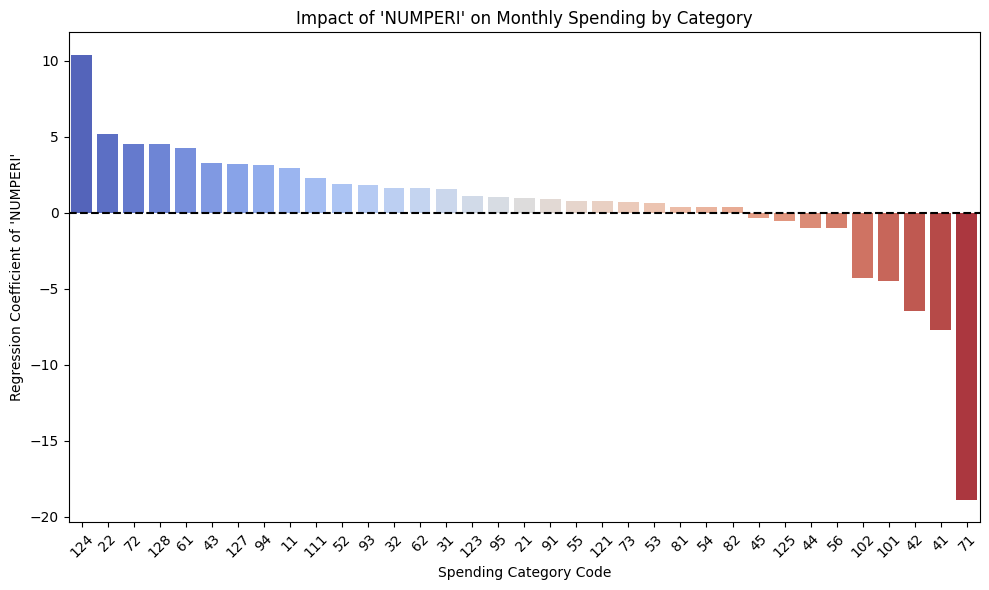

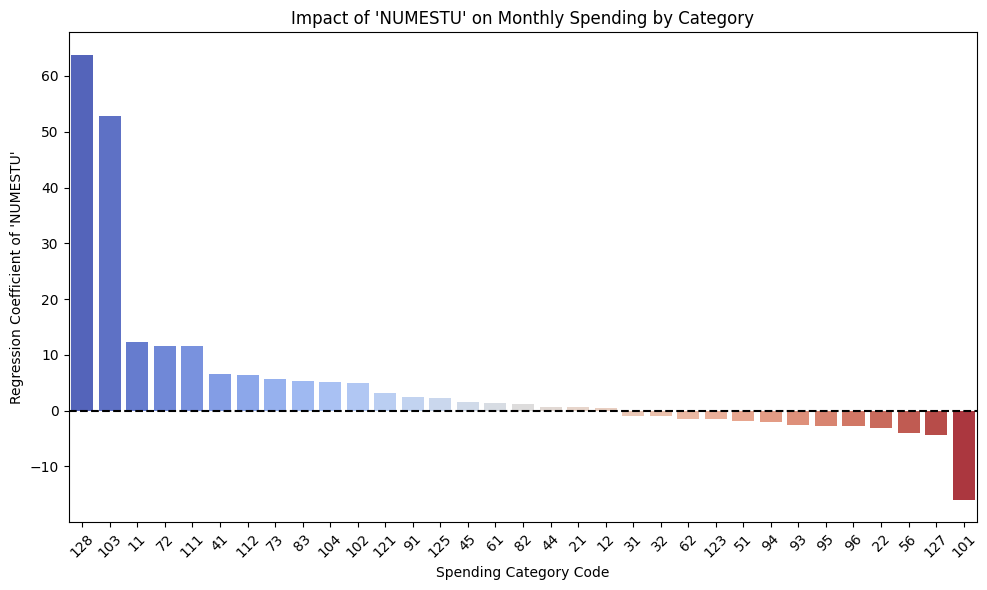

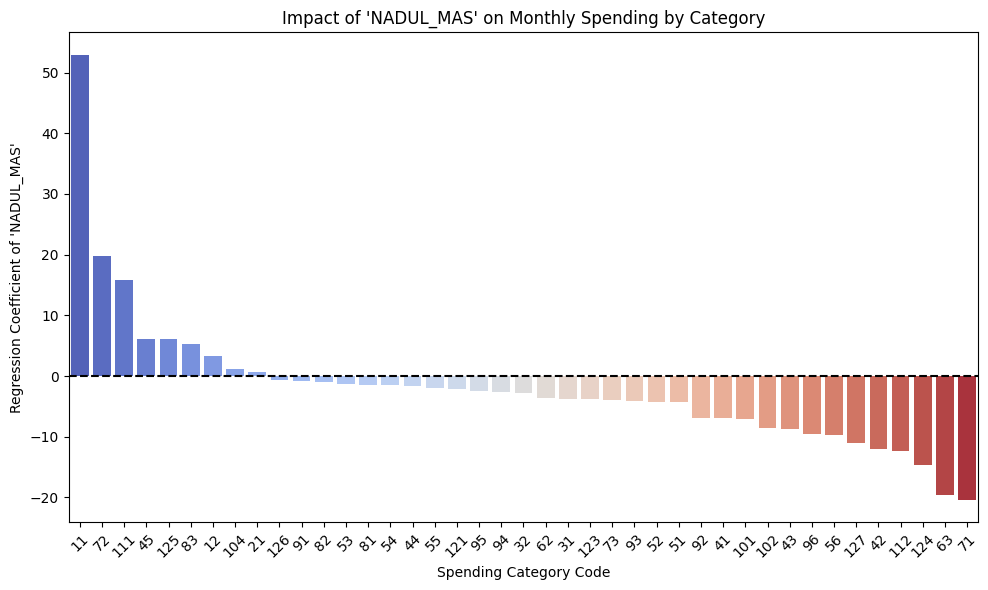

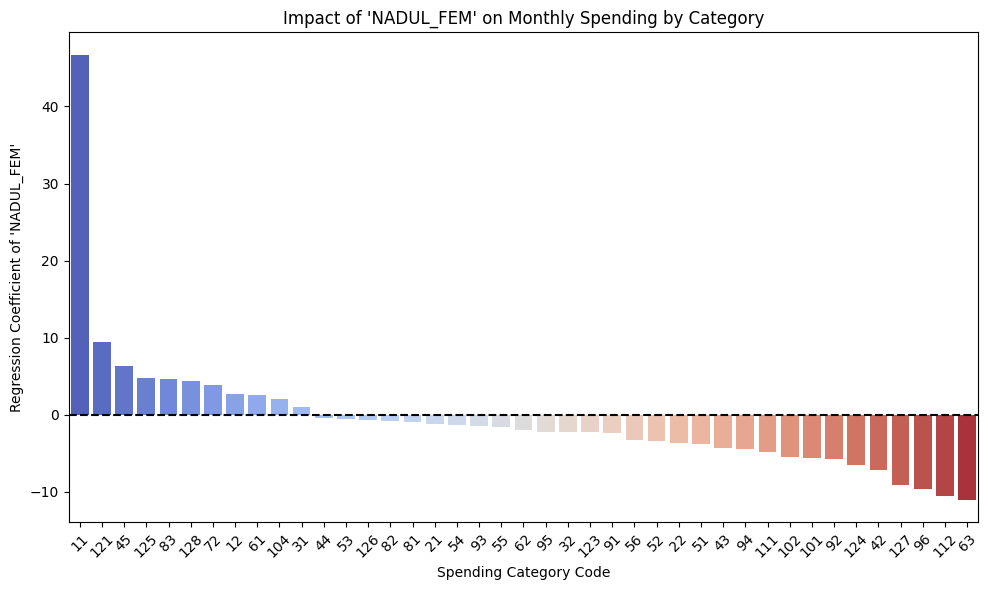

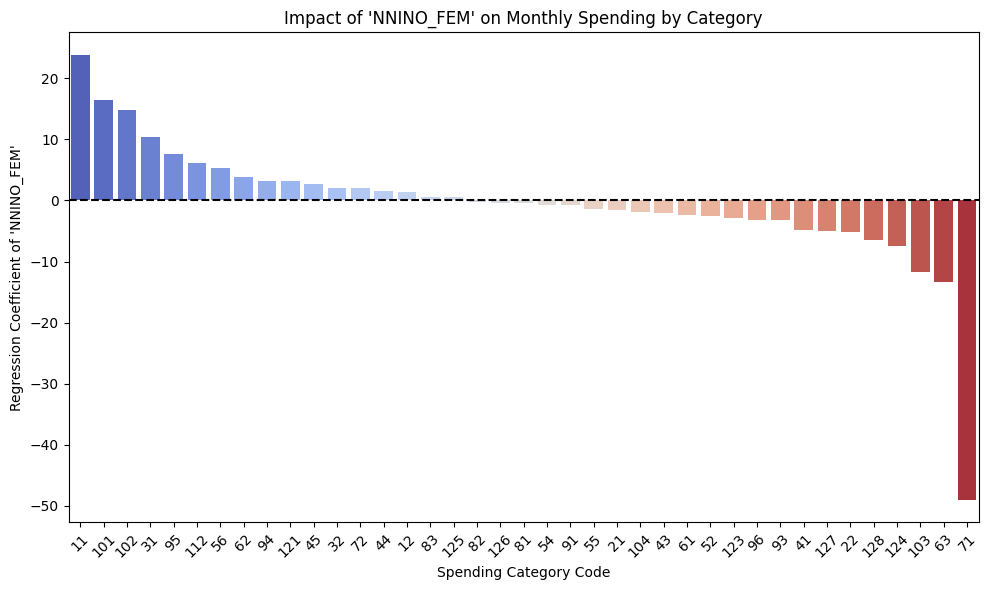

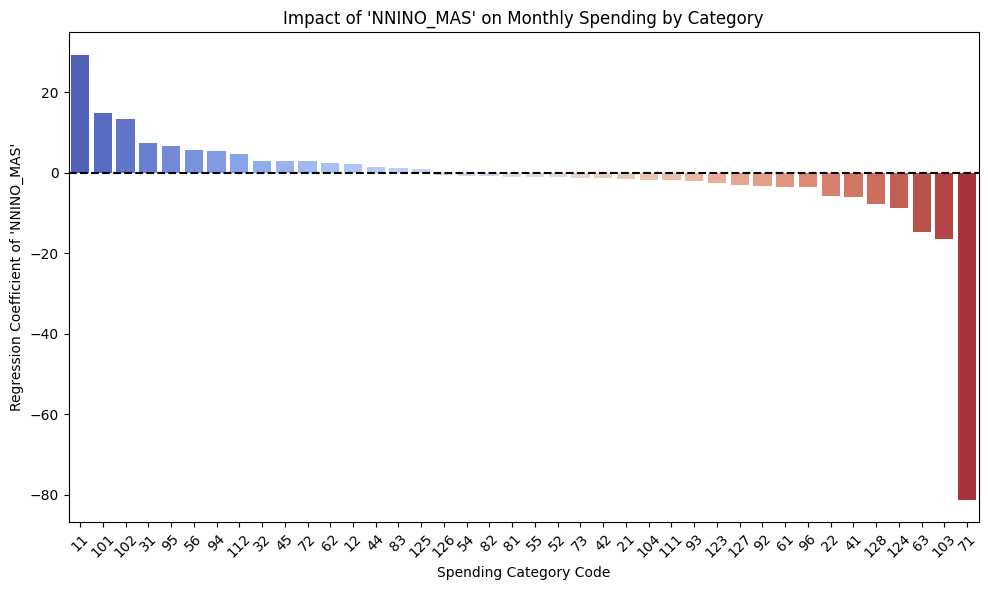

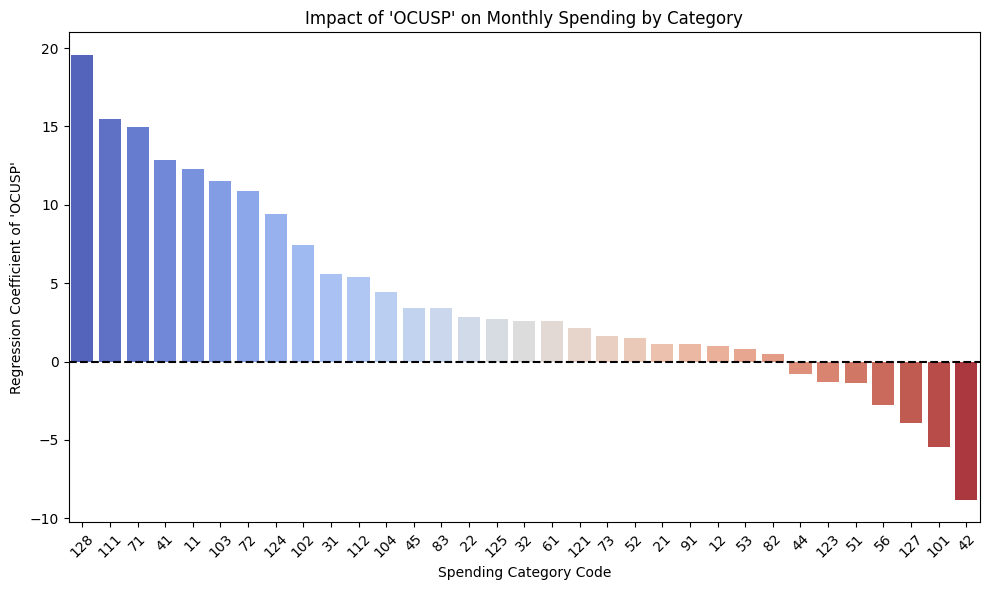

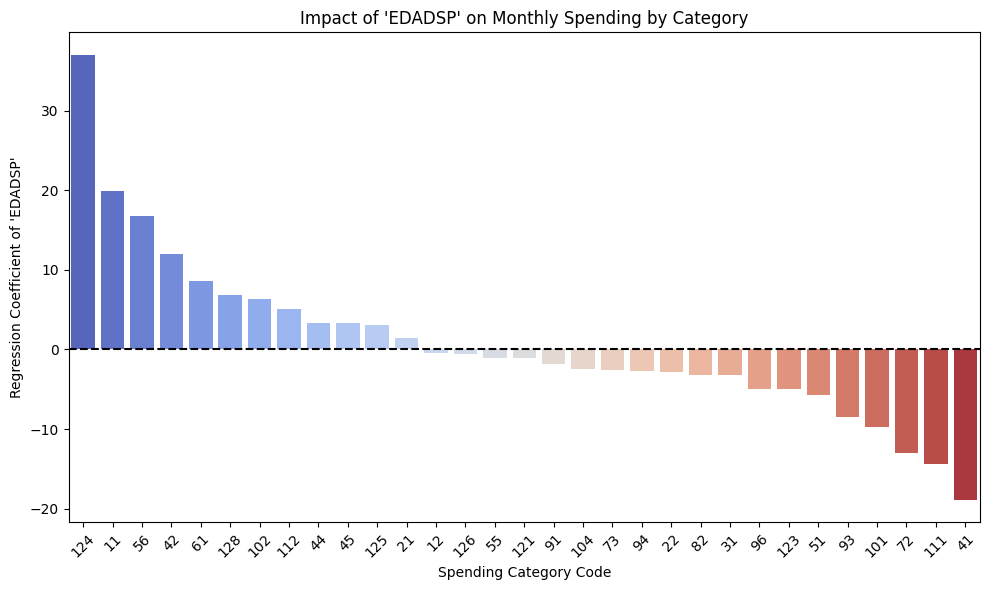

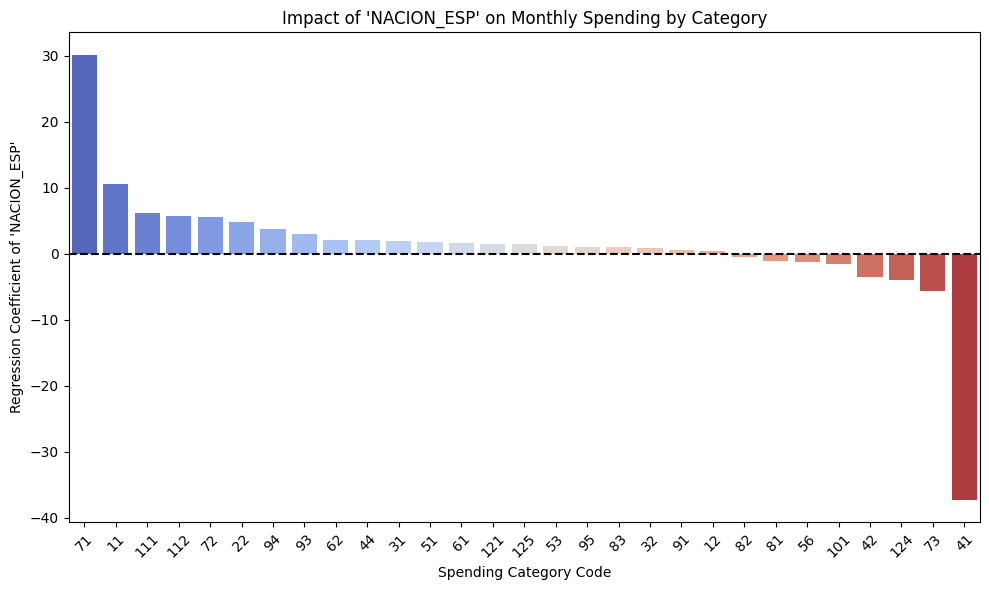

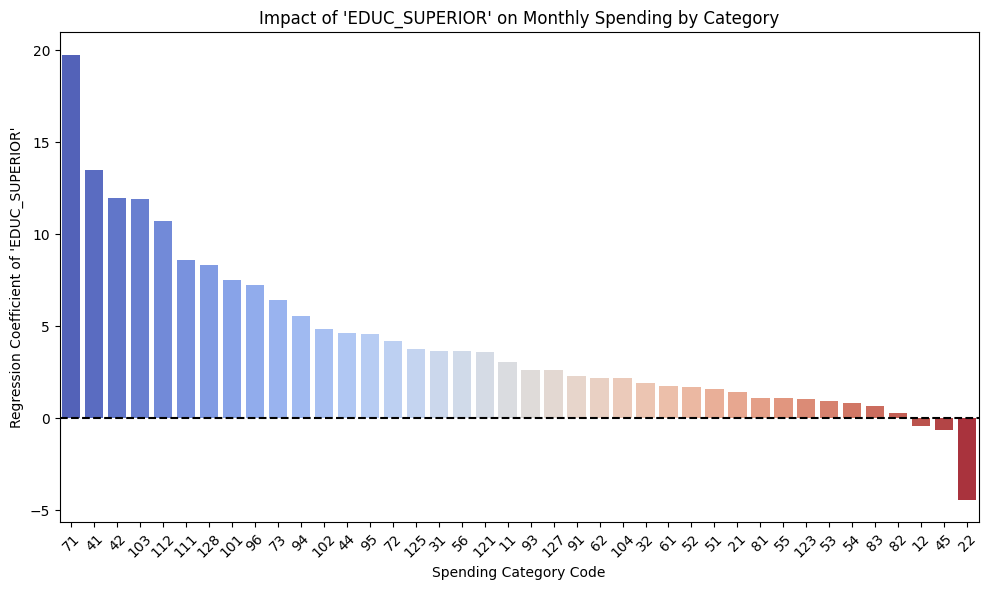

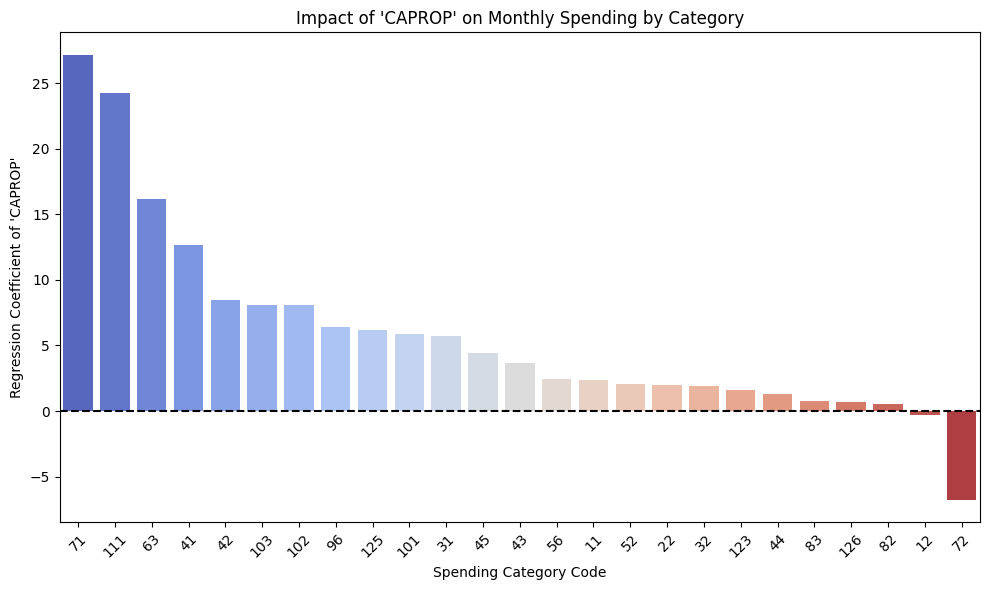

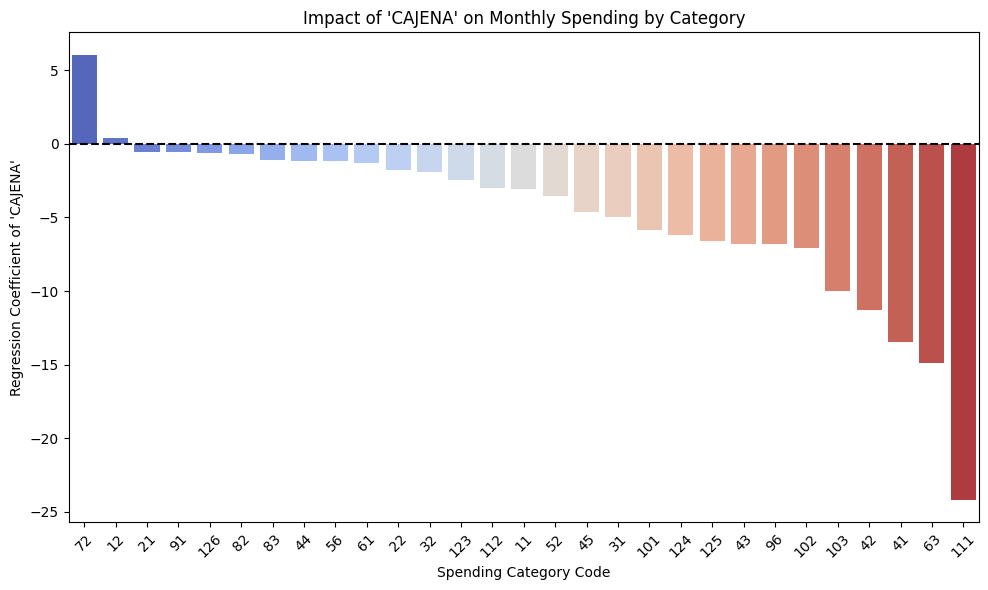

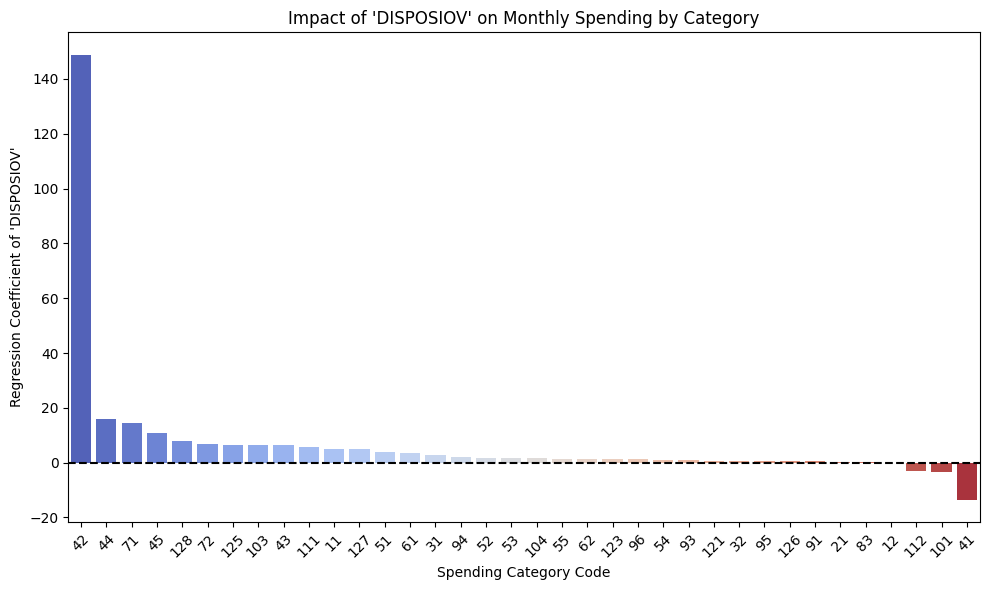

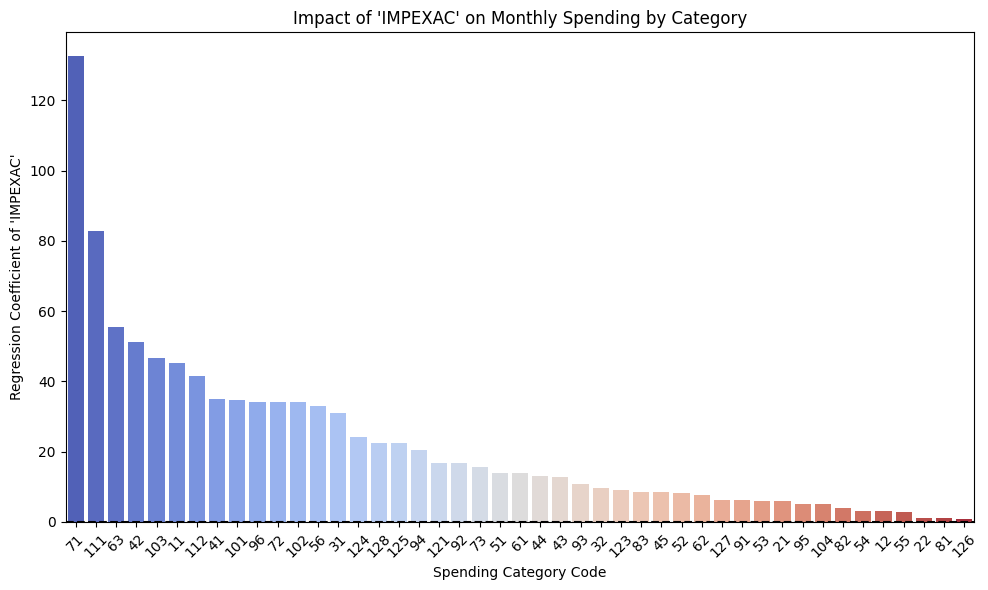

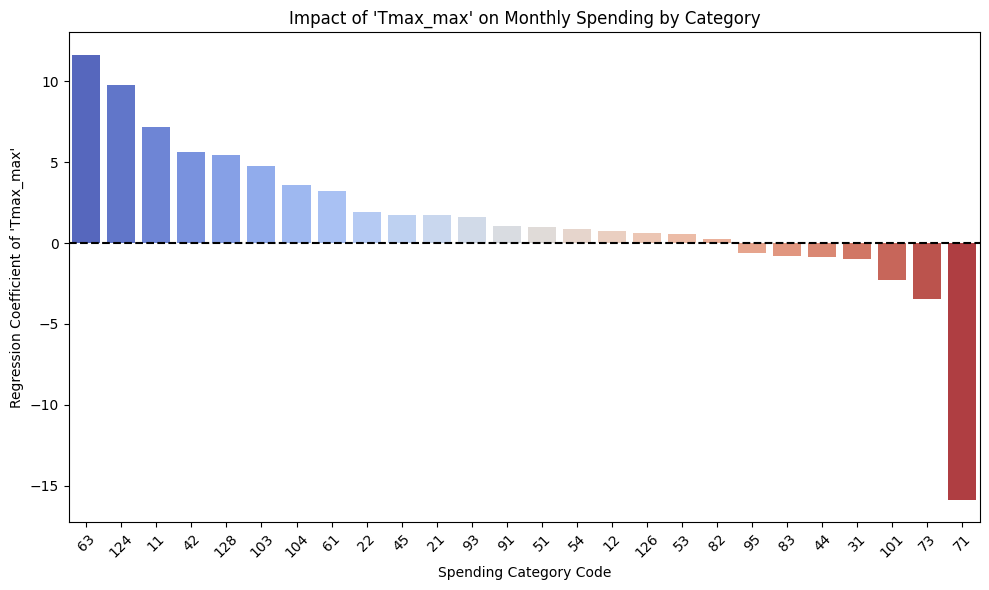

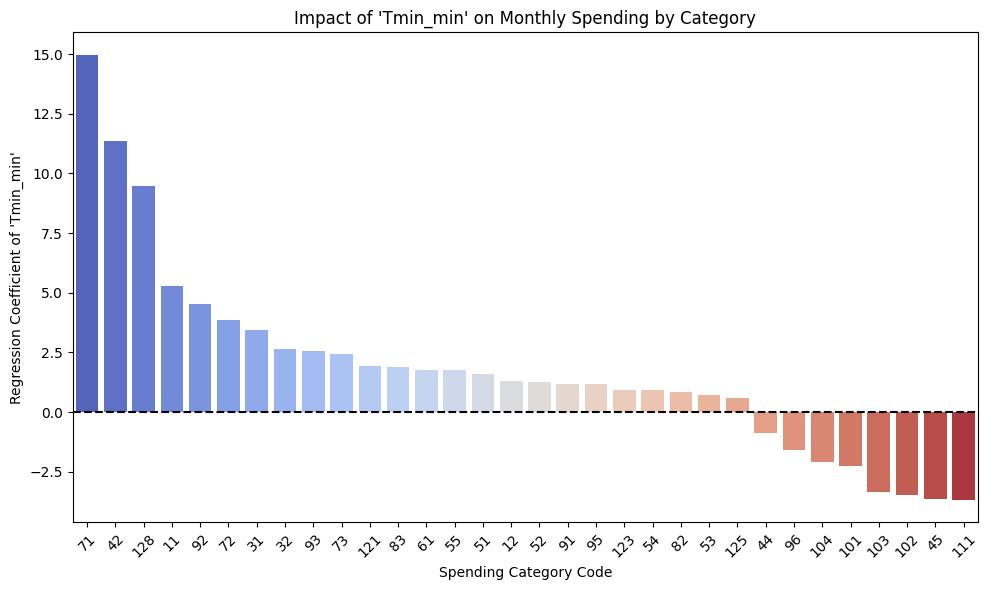

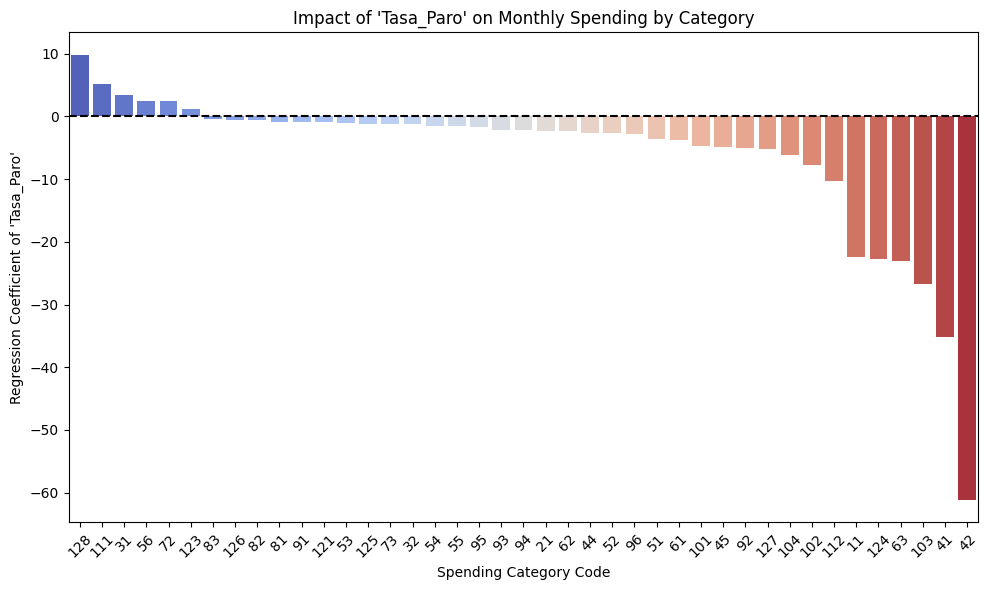

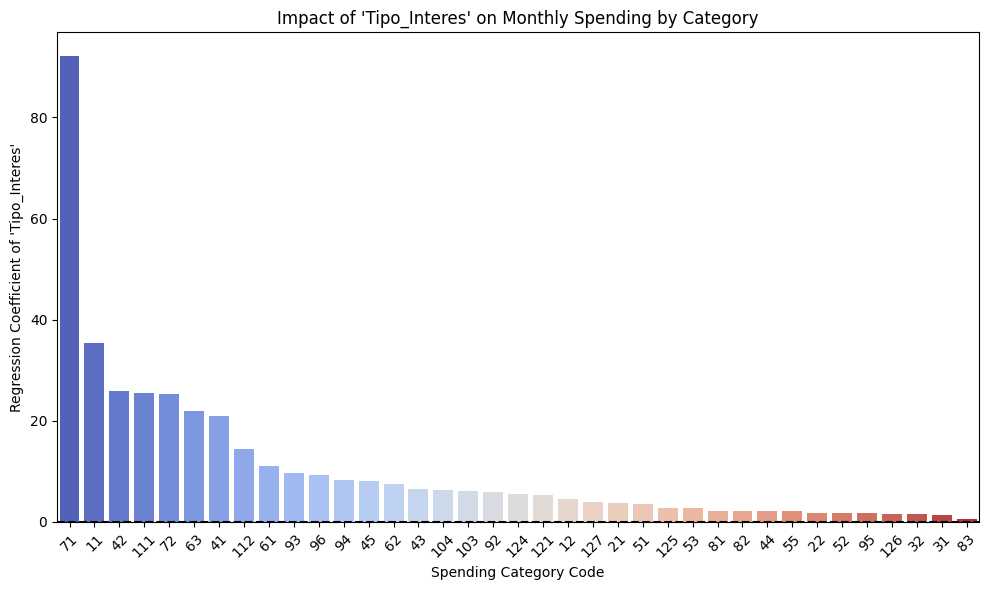

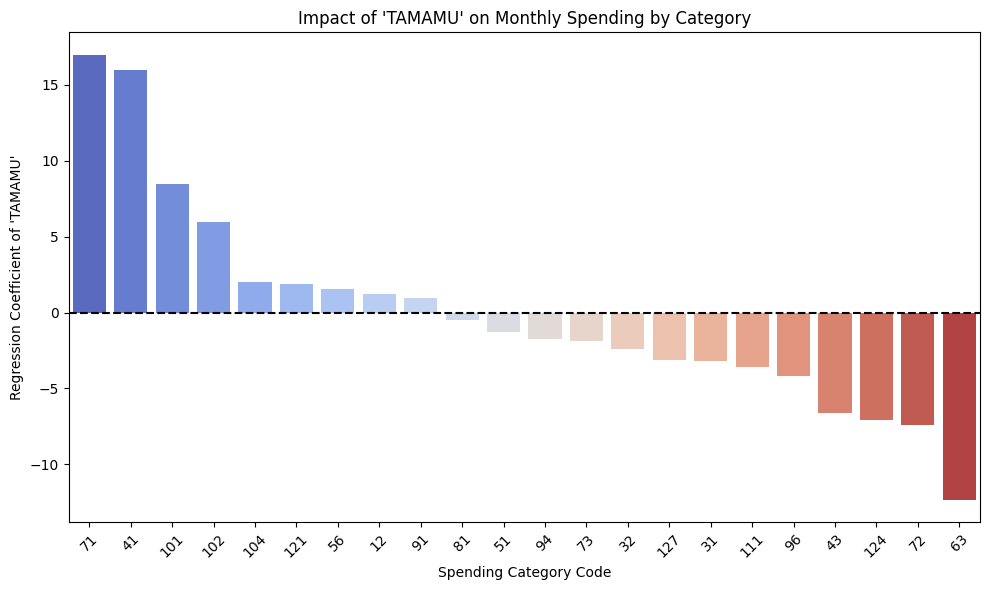

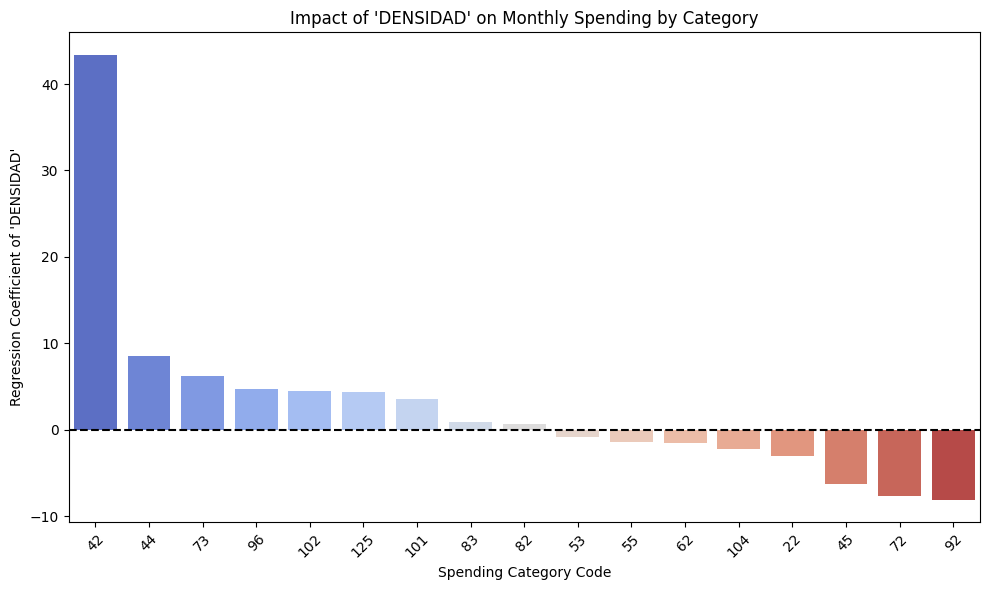

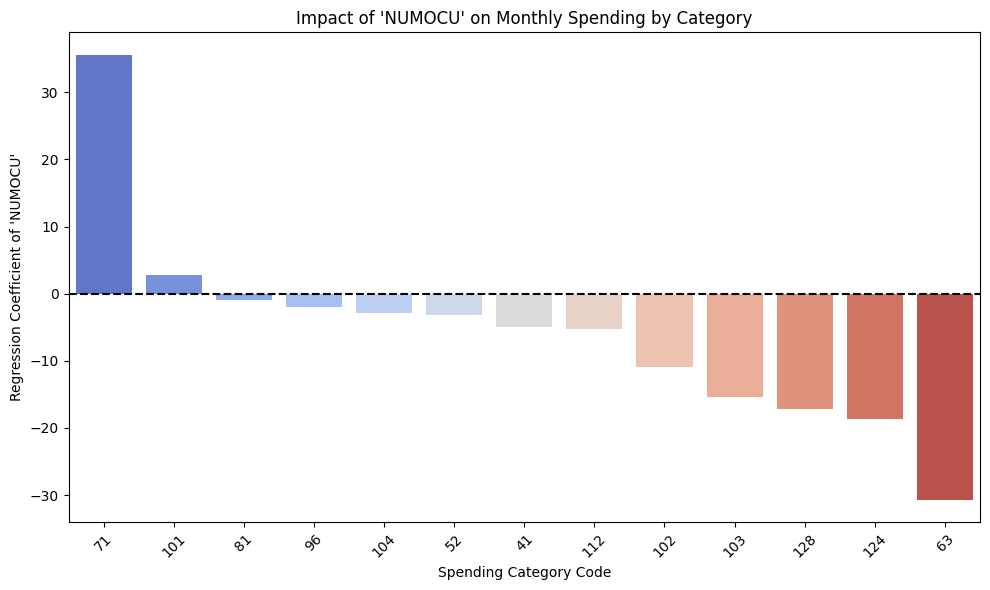

In [16]:
plot_variable_impact_across_categories(coef_df)

## 📊 Interpretación de un Modelo de Regresión Lineal Múltiple (sin normalizar)

### 🔍 ¿Qué significa que el modelo no esté normalizado?

En este caso, las variables **se mantienen en sus unidades originales**:

- Ingresos → en euros
- Edad → en años
- Numero de miembros del hogar (`NMIEMB`) → en número de personas
- Etc.

---

### 🎯 Interpretación de los coeficientes

Cada **coeficiente** representa el **cambio esperado en la variable dependiente (por ejemplo, gasto mensual en euros)** al aumentar en **una unidad real** la variable explicativa, manteniendo las demás constantes.

---

### 💡 Ejemplo con `NMIEMB` (Número de miembros del hogar)

El gráfico muestra el efecto de `NMIEMB` (sin normalizar) sobre el gasto mensual en cada categoría:

- En la **categoría 1 (Alimentos y bebidas no alcohólicas)**, el coeficiente es **+12** →  
  → *Cada miembro adicional en el hogar incrementa el gasto en alimentación en aproximadamente 12 euros.*

- En la **categoría 4 (Vivienda, agua, electricidad, gas)**, el coeficiente es **-7** →  
  → *Cada miembro adicional se asocia con una reducción del gasto en vivienda de unos 7 euros, posiblemente por reparto de costes fijos.*

- En la **categoría 10 (Enseñanza)**, el coeficiente es **+10** →  
  → *Hogares con más miembros suelen destinar más gasto total a educación.*

---

### ✅ Ventajas del modelo sin normalizar

- **Interpretación directa y clara**, en unidades reales (euros, años, personas...).
- Ideal cuando se quiere entender el impacto económico **real** de una variable.

---

### ⚠️ Consideraciones

- **Las escalas pueden distorsionar la comparación**: variables con unidades más grandes pueden tener coeficientes más grandes, pero no necesariamente más importantes.
- Si se quiere comparar la importancia relativa entre variables, es preferible normalizar.

---

### 🧠 Conclusión

> En modelos no normalizados, **los coeficientes reflejan el impacto real y directo de las variables** en la variable objetivo, facilitando una interpretación económica concreta.

